#  **Housing Prices Analysis in Top Tier Cities in India**

---



## <pre> Mounting Google Drive into Google Colab </pre>

In [372]:
from google.colab import drive

In [373]:
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [374]:
!ls '/content/gdrive/My Drive/Projects/IndianHousingPrices/Data'

Bangalore.csv	       Delhi.csv	  Mumbai.csv
bangalore_updated.csv  delhi_updated.csv  mumbai_updated.csv


***

### <pre>Importing Required Libraries</pre>

In [375]:
import warnings
warnings.filterwarnings('ignore')

In [376]:
pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [377]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from geopy.geocoders import Nominatim
import folium
from folium import plugins

%matplotlib inline

***

![Bangalore Image](https://media.giphy.com/media/LnWAqDfCpfPSmnedvT/giphy.gif)

In [378]:
bangalore_df = pd.read_csv('/content/gdrive/My Drive/Projects/IndianHousingPrices/Data/Bangalore.csv')

In [379]:
bangalore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6207 entries, 0 to 6206
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                6207 non-null   int64 
 1   Area                 6207 non-null   int64 
 2   Location             6207 non-null   object
 3   No. of Bedrooms      6207 non-null   int64 
 4   Resale               6207 non-null   int64 
 5   MaintenanceStaff     6207 non-null   int64 
 6   Gymnasium            6207 non-null   int64 
 7   SwimmingPool         6207 non-null   int64 
 8   LandscapedGardens    6207 non-null   int64 
 9   JoggingTrack         6207 non-null   int64 
 10  RainWaterHarvesting  6207 non-null   int64 
 11  IndoorGames          6207 non-null   int64 
 12  ShoppingMall         6207 non-null   int64 
 13  Intercom             6207 non-null   int64 
 14  SportsFacility       6207 non-null   int64 
 15  ATM                  6207 non-null   int64 
 16  ClubHo

In [380]:
bangalore_df.sample(5)

Price  Area              Location  No. of Bedrooms  Resale  \
2601  2633000  1129    Kumaraswamy Layout                2       0   
5020  3100000  2625          Kundalahalli                3       1   
2101  2691000  1310        Narayanaghatta                3       0   
4147  8400000  1400  Rajarajeshwari nagar                3       0   
1381  5739000  1693              RR Nagar                3       1   

      MaintenanceStaff  Gymnasium  SwimmingPool  LandscapedGardens  \
2601                 9          9             9                  9   
5020                 9          9             9                  9   
2101                 9          9             9                  9   
4147                 9          9             9                  9   
1381                 0          1             1                  1   

      JoggingTrack  ...  LiftAvailable  BED  VaastuCompliant  Microwave  \
2601             9  ...              9    9                9          9   
5020             9  ...              9    9                9          9   
2101             9  ...              9    9                9          9   
4147             9  ...              9    9                9          9   
1381             1  ...              1    0                1          0   

      GolfCourse  TV  DiningTable  Sofa  Wardrobe  Refrigerator  
2601           9   9            9     9         9             9  
5020           9   9            9     9         9             9  
2101           9   9            9     9         9             9  
4147           9   9            9     9         9             9  
1381           0   0            0     0         0             0  

[5 rows x 40 columns]

***

![Delhi Image](https://media.giphy.com/media/hSEwaRIfSa4np4l5d5/giphy.gif)

In [381]:
delhi_df = pd.read_csv('/content/gdrive/My Drive/Projects/IndianHousingPrices/Data/Delhi.csv')

In [382]:
delhi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                4998 non-null   int64 
 1   Area                 4998 non-null   int64 
 2   Location             4998 non-null   object
 3   No. of Bedrooms      4998 non-null   int64 
 4   Resale               4998 non-null   int64 
 5   MaintenanceStaff     4998 non-null   int64 
 6   Gymnasium            4998 non-null   int64 
 7   SwimmingPool         4998 non-null   int64 
 8   LandscapedGardens    4998 non-null   int64 
 9   JoggingTrack         4998 non-null   int64 
 10  RainWaterHarvesting  4998 non-null   int64 
 11  IndoorGames          4998 non-null   int64 
 12  ShoppingMall         4998 non-null   int64 
 13  Intercom             4998 non-null   int64 
 14  SportsFacility       4998 non-null   int64 
 15  ATM                  4998 non-null   int64 
 16  ClubHo

In [383]:
delhi_df.sample(5)

Price  Area          Location  No. of Bedrooms  Resale  \
1412   4000000   720            nawada                3       1   
1351   7000000  1200  Sector 23 Rohini                3       1   
1220  32500000  2400  Sector 11 Dwarka                4       1   
3499  17500000  2300   Sector 2 Dwarka                4       1   
2886  10500000   756           Block H                2       1   

      MaintenanceStaff  Gymnasium  SwimmingPool  LandscapedGardens  \
1412                 0          0             0                  0   
1351                 0          0             0                  0   
1220                 0          0             0                  0   
3499                 9          9             9                  9   
2886                 9          9             9                  9   

      JoggingTrack  ...  LiftAvailable  BED  VaastuCompliant  Microwave  \
1412             0  ...              1    0                0          0   
1351             0  ...              1    0                0          0   
1220             0  ...              0    0                0          0   
3499             9  ...              9    9                9          9   
2886             9  ...              9    9                9          9   

      GolfCourse  TV  DiningTable  Sofa  Wardrobe  Refrigerator  
1412           0   0            0     0         0             0  
1351           0   0            0     0         0             0  
1220           0   0            0     0         0             0  
3499           9   9            9     9         9             9  
2886           9   9            9     9         9             9  

[5 rows x 40 columns]

***

![Mumbai Image](https://media.giphy.com/media/STrgyibuarMZKHDQms/giphy.gif)

In [384]:
mumbai_df = pd.read_csv('/content/gdrive/My Drive/Projects/IndianHousingPrices/Data/Mumbai.csv')

In [385]:
mumbai_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7719 entries, 0 to 7718
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                7719 non-null   int64 
 1   Area                 7719 non-null   int64 
 2   Location             7719 non-null   object
 3   No. of Bedrooms      7719 non-null   int64 
 4   Resale               7719 non-null   int64 
 5   MaintenanceStaff     7719 non-null   int64 
 6   Gymnasium            7719 non-null   int64 
 7   SwimmingPool         7719 non-null   int64 
 8   LandscapedGardens    7719 non-null   int64 
 9   JoggingTrack         7719 non-null   int64 
 10  RainWaterHarvesting  7719 non-null   int64 
 11  IndoorGames          7719 non-null   int64 
 12  ShoppingMall         7719 non-null   int64 
 13  Intercom             7719 non-null   int64 
 14  SportsFacility       7719 non-null   int64 
 15  ATM                  7719 non-null   int64 
 16  ClubHo

In [386]:
mumbai_df.sample(5)

Price  Area        Location  No. of Bedrooms  Resale  \
958   16000000   900       Link Road                2       1   
4693   7500000   665     Kalyan West                1       1   
6845   2925000   580     Nala Sopara                1       1   
4730   8900000   650  Kandivali East                1       1   
3946   3000000  1150            Ulwe                2       1   

      MaintenanceStaff  Gymnasium  SwimmingPool  LandscapedGardens  \
958                  1          1             0                  0   
4693                 9          9             9                  9   
6845                 9          9             9                  9   
4730                 9          9             9                  9   
3946                 9          9             9                  9   

      JoggingTrack  ...  LiftAvailable  BED  VaastuCompliant  Microwave  \
958              0  ...              1    1                1          1   
4693             9  ...              9    9                9          9   
6845             9  ...              9    9                9          9   
4730             9  ...              9    9                9          9   
3946             9  ...              9    9                9          9   

      GolfCourse  TV  DiningTable  Sofa  Wardrobe  Refrigerator  
958            0   1            1     1         1             1  
4693           9   9            9     9         9             9  
6845           9   9            9     9         9             9  
4730           9   9            9     9         9             9  
3946           9   9            9     9         9             9  

[5 rows x 40 columns]

<pre>We have imported Bangalore, Delhi & Mumbai Datasets, 
and it shows that there are some 40 variables/features in the data including the Price.</pre>

As per the Data Definition, `Price`, `Area`, `Location` & `Bedrooms` are Numerical/Continuous variables, rest all are Categorical Variables.
But these Categorical variables have three types of values, <br>
<code>0 = Particular facility is absent in the House</code><br>
<code>1 = Particular facility is present in the House</code><br>
<code>9 = No information is available for the variable, whether it is present or not</code>

***

### <pre>Handling Missing Values</pre>

In [387]:
bangalore_df.replace(9,np.nan, inplace=True)
delhi_df.replace(9,np.nan, inplace=True)
mumbai_df.replace(9,np.nan, inplace=True)

In [388]:
bangalore_df.dropna(axis=0, inplace=True)
delhi_df.dropna(axis=0, inplace=True)
mumbai_df.dropna(axis=0, inplace=True)

In [389]:
bangalore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1951 entries, 0 to 1950
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                1951 non-null   int64  
 1   Area                 1951 non-null   int64  
 2   Location             1951 non-null   object 
 3   No. of Bedrooms      1951 non-null   int64  
 4   Resale               1951 non-null   int64  
 5   MaintenanceStaff     1951 non-null   float64
 6   Gymnasium            1951 non-null   float64
 7   SwimmingPool         1951 non-null   float64
 8   LandscapedGardens    1951 non-null   float64
 9   JoggingTrack         1951 non-null   float64
 10  RainWaterHarvesting  1951 non-null   float64
 11  IndoorGames          1951 non-null   float64
 12  ShoppingMall         1951 non-null   float64
 13  Intercom             1951 non-null   float64
 14  SportsFacility       1951 non-null   float64
 15  ATM                  1951 non-null   f

In [390]:
delhi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2002 entries, 0 to 2001
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                2002 non-null   int64  
 1   Area                 2002 non-null   int64  
 2   Location             2002 non-null   object 
 3   No. of Bedrooms      2002 non-null   int64  
 4   Resale               2002 non-null   int64  
 5   MaintenanceStaff     2002 non-null   float64
 6   Gymnasium            2002 non-null   float64
 7   SwimmingPool         2002 non-null   float64
 8   LandscapedGardens    2002 non-null   float64
 9   JoggingTrack         2002 non-null   float64
 10  RainWaterHarvesting  2002 non-null   float64
 11  IndoorGames          2002 non-null   float64
 12  ShoppingMall         2002 non-null   float64
 13  Intercom             2002 non-null   float64
 14  SportsFacility       2002 non-null   float64
 15  ATM                  2002 non-null   f

In [391]:
mumbai_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1398 entries, 0 to 1397
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                1398 non-null   int64  
 1   Area                 1398 non-null   int64  
 2   Location             1398 non-null   object 
 3   No. of Bedrooms      1398 non-null   int64  
 4   Resale               1398 non-null   int64  
 5   MaintenanceStaff     1398 non-null   float64
 6   Gymnasium            1398 non-null   float64
 7   SwimmingPool         1398 non-null   float64
 8   LandscapedGardens    1398 non-null   float64
 9   JoggingTrack         1398 non-null   float64
 10  RainWaterHarvesting  1398 non-null   float64
 11  IndoorGames          1398 non-null   float64
 12  ShoppingMall         1398 non-null   float64
 13  Intercom             1398 non-null   float64
 14  SportsFacility       1398 non-null   float64
 15  ATM                  1398 non-null   f

We performed some Cleaning Process, and removed the Missing values,i.e. `9s` from all the categorical values, because it contains a big portion of the data as missing, so it cannot be imputed with majority category of the variable, it may impact the analysis.
In order to do that we converted all `9s` to `NaN` values and removed those rows.
As a result we are left with `1951` entries in Bangalore, `2002` entries in Delhi & `1398` entries in Mumbai Data to perform the further analysis.

***

#### Variable Conversions

In [392]:
bangalore_df.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

In [393]:
NonFloatColumns = ['Price','Area','Location','No. of Bedrooms']
ColumnsToConvert = []
for col in bangalore_df.columns:
    if col not in NonFloatColumns:
        ColumnsToConvert.append(col)
ColumnsToConvert

['Resale',
 'MaintenanceStaff',
 'Gymnasium',
 'SwimmingPool',
 'LandscapedGardens',
 'JoggingTrack',
 'RainWaterHarvesting',
 'IndoorGames',
 'ShoppingMall',
 'Intercom',
 'SportsFacility',
 'ATM',
 'ClubHouse',
 'School',
 '24X7Security',
 'PowerBackup',
 'CarParking',
 'StaffQuarter',
 'Cafeteria',
 'MultipurposeRoom',
 'Hospital',
 'WashingMachine',
 'Gasconnection',
 'AC',
 'Wifi',
 "Children'splayarea",
 'LiftAvailable',
 'BED',
 'VaastuCompliant',
 'Microwave',
 'GolfCourse',
 'TV',
 'DiningTable',
 'Sofa',
 'Wardrobe',
 'Refrigerator']

While Handling Missing Values, we realized that the Categorical Variables(By Definition) are actually Numeric in nature, so we identified the list of all those columns and below we will convert them to required DataType, i.e. Object(String)

In [394]:
bangalore_df[ColumnsToConvert] = bangalore_df[ColumnsToConvert].astype(str)
delhi_df[ColumnsToConvert] = delhi_df[ColumnsToConvert].astype(str)
mumbai_df[ColumnsToConvert] = mumbai_df[ColumnsToConvert].astype(str)

In [395]:
replace_dict = {'0':'No','1':'Yes','0.0':'No','1.0':'Yes'}
bangalore_df[ColumnsToConvert] = bangalore_df[ColumnsToConvert].replace(replace_dict)
delhi_df[ColumnsToConvert] = delhi_df[ColumnsToConvert].replace(replace_dict)
mumbai_df[ColumnsToConvert] = mumbai_df[ColumnsToConvert].replace(replace_dict)

In [396]:
bangalore_df.head()

Price  Area                         Location  No. of Bedrooms Resale  \
0  30000000  3340                 JP Nagar Phase 1                4     No   
1   7888000  1045       Dasarahalli on Tumkur Road                2     No   
2   4866000  1179  Kannur on Thanisandra Main Road                2     No   
3   8358000  1675                     Doddanekundi                3     No   
4   6845000  1670                          Kengeri                3     No   

  MaintenanceStaff Gymnasium SwimmingPool LandscapedGardens JoggingTrack  ...  \
0              Yes       Yes          Yes               Yes          Yes  ...   
1               No       Yes          Yes               Yes          Yes  ...   
2               No       Yes          Yes               Yes          Yes  ...   
3               No        No           No                No           No  ...   
4              Yes       Yes          Yes               Yes          Yes  ...   

  LiftAvailable BED VaastuCompliant Microwave GolfCourse  TV DiningTable Sofa  \
0           Yes  No              No        No         No  No          No   No   
1           Yes  No             Yes        No         No  No          No   No   
2           Yes  No              No        No         No  No          No   No   
3           Yes  No              No        No         No  No          No   No   
4           Yes  No              No        No         No  No          No   No   

  Wardrobe Refrigerator  
0       No           No  
1       No           No  
2       No           No  
3       No           No  
4       No           No  

[5 rows x 40 columns]

In [397]:
delhi_df.head()

Price  Area          Location  No. of Bedrooms Resale MaintenanceStaff  \
0  10500000  1200  Sector 10 Dwarka                2    Yes               No   
1   6000000  1000       Uttam Nagar                3     No               No   
2  15000000  1350      Sarita Vihar                2    Yes               No   
3   2500000   435       Uttam Nagar                2     No               No   
4   5800000   900        Dwarka Mor                3     No               No   

  Gymnasium SwimmingPool LandscapedGardens JoggingTrack  ... LiftAvailable  \
0       Yes           No                No          Yes  ...           Yes   
1        No           No                No           No  ...            No   
2        No           No                No           No  ...            No   
3        No           No                No           No  ...            No   
4        No           No                No           No  ...           Yes   

  BED VaastuCompliant Microwave GolfCourse  TV DiningTable Sofa Wardrobe  \
0  No             Yes        No         No  No          No   No       No   
1  No              No        No         No  No          No   No       No   
2  No              No        No         No  No          No   No       No   
3  No             Yes        No         No  No          No   No       No   
4  No              No        No         No  No          No   No       No   

  Refrigerator  
0           No  
1           No  
2           No  
3           No  
4           No  

[5 rows x 40 columns]

In [398]:
mumbai_df.head()

Price  Area  Location  No. of Bedrooms Resale MaintenanceStaff Gymnasium  \
0  4850000   720  Kharghar                1    Yes              Yes        No   
1  4500000   600  Kharghar                1    Yes              Yes       Yes   
2  6700000   650  Kharghar                1    Yes              Yes       Yes   
3  4500000   650  Kharghar                1    Yes              Yes        No   
4  5000000   665  Kharghar                1    Yes              Yes        No   

  SwimmingPool LandscapedGardens JoggingTrack  ... LiftAvailable  BED  \
0           No                No           No  ...           Yes   No   
1          Yes                No          Yes  ...           Yes   No   
2          Yes                No          Yes  ...           Yes   No   
3           No               Yes           No  ...           Yes  Yes   
4           No               Yes           No  ...           Yes   No   

  VaastuCompliant Microwave GolfCourse  TV DiningTable Sofa Wardrobe  \
0             Yes        No         No  No          No   No       No   
1             Yes        No         No  No          No   No       No   
2             Yes        No         No  No          No   No       No   
3             Yes        No         No  No          No   No      Yes   
4             Yes        No         No  No          No   No       No   

  Refrigerator  
0           No  
1           No  
2           No  
3           No  
4           No  

[5 rows x 40 columns]

***

#### Feature Scaling

`Price`, `Area` & `Bedrooms` are only Numerical Variables in our data, but they are not of same order, like Price is having very high values, so it is difficult to interpret them with `Area` & `Bedrooms` on plots. So we will take them on the same scale

In [399]:
# Converting Price to Tens of Lacs
bangalore_df.Price = bangalore_df.Price/100000
delhi_df.Price = delhi_df.Price/100000
mumbai_df.Price = mumbai_df.Price/100000

In [400]:
#Converting Area to Hundreds of Sq feet
bangalore_df.Area = bangalore_df.Area/100
delhi_df.Area = delhi_df.Area/100
mumbai_df.Area = mumbai_df.Area/100

In [401]:
bangalore_df.head()

Price   Area                         Location  No. of Bedrooms Resale  \
0  300.00  33.40                 JP Nagar Phase 1                4     No   
1   78.88  10.45       Dasarahalli on Tumkur Road                2     No   
2   48.66  11.79  Kannur on Thanisandra Main Road                2     No   
3   83.58  16.75                     Doddanekundi                3     No   
4   68.45  16.70                          Kengeri                3     No   

  MaintenanceStaff Gymnasium SwimmingPool LandscapedGardens JoggingTrack  ...  \
0              Yes       Yes          Yes               Yes          Yes  ...   
1               No       Yes          Yes               Yes          Yes  ...   
2               No       Yes          Yes               Yes          Yes  ...   
3               No        No           No                No           No  ...   
4              Yes       Yes          Yes               Yes          Yes  ...   

  LiftAvailable BED VaastuCompliant Microwave GolfCourse  TV DiningTable Sofa  \
0           Yes  No              No        No         No  No          No   No   
1           Yes  No             Yes        No         No  No          No   No   
2           Yes  No              No        No         No  No          No   No   
3           Yes  No              No        No         No  No          No   No   
4           Yes  No              No        No         No  No          No   No   

  Wardrobe Refrigerator  
0       No           No  
1       No           No  
2       No           No  
3       No           No  
4       No           No  

[5 rows x 40 columns]

In [402]:
bangalore_df.describe()

Price         Area  No. of Bedrooms
count  1951.000000  1951.000000      1951.000000
mean     99.530030    15.156028         2.532035
std     129.301584     7.640693         0.677002
min      20.960000     5.250000         1.000000
25%      49.735000    11.470000         2.000000
50%      69.500000    13.300000         3.000000
75%     100.000000    16.100000         3.000000
max    2027.000000    99.000000         5.000000

In [403]:
delhi_df.head()

Price   Area          Location  No. of Bedrooms Resale MaintenanceStaff  \
0  105.0  12.00  Sector 10 Dwarka                2    Yes               No   
1   60.0  10.00       Uttam Nagar                3     No               No   
2  150.0  13.50      Sarita Vihar                2    Yes               No   
3   25.0   4.35       Uttam Nagar                2     No               No   
4   58.0   9.00        Dwarka Mor                3     No               No   

  Gymnasium SwimmingPool LandscapedGardens JoggingTrack  ... LiftAvailable  \
0       Yes           No                No          Yes  ...           Yes   
1        No           No                No           No  ...            No   
2        No           No                No           No  ...            No   
3        No           No                No           No  ...            No   
4        No           No                No           No  ...           Yes   

  BED VaastuCompliant Microwave GolfCourse  TV DiningTable Sofa Wardrobe  \
0  No             Yes        No         No  No          No   No       No   
1  No              No        No         No  No          No   No       No   
2  No              No        No         No  No          No   No       No   
3  No             Yes        No         No  No          No   No       No   
4  No              No        No         No  No          No   No       No   

  Refrigerator  
0           No  
1           No  
2           No  
3           No  
4           No  

[5 rows x 40 columns]

In [404]:
delhi_df.describe()

Price         Area  No. of Bedrooms
count  2002.000000  2002.000000      2002.000000
mean    102.947158    12.001414         2.688811
std      91.198484     6.143408         0.729588
min      20.000000     2.000000         1.000000
25%      36.000000     7.200000         2.000000
50%      70.000000    10.000000         3.000000
75%     155.000000    17.000000         3.000000
max    1625.000000    64.000000         5.000000

In [405]:
mumbai_df.head()

Price  Area  Location  No. of Bedrooms Resale MaintenanceStaff Gymnasium  \
0   48.5  7.20  Kharghar                1    Yes              Yes        No   
1   45.0  6.00  Kharghar                1    Yes              Yes       Yes   
2   67.0  6.50  Kharghar                1    Yes              Yes       Yes   
3   45.0  6.50  Kharghar                1    Yes              Yes        No   
4   50.0  6.65  Kharghar                1    Yes              Yes        No   

  SwimmingPool LandscapedGardens JoggingTrack  ... LiftAvailable  BED  \
0           No                No           No  ...           Yes   No   
1          Yes                No          Yes  ...           Yes   No   
2          Yes                No          Yes  ...           Yes   No   
3           No               Yes           No  ...           Yes  Yes   
4           No               Yes           No  ...           Yes   No   

  VaastuCompliant Microwave GolfCourse  TV DiningTable Sofa Wardrobe  \
0             Yes        No         No  No          No   No       No   
1             Yes        No         No  No          No   No       No   
2             Yes        No         No  No          No   No       No   
3             Yes        No         No  No          No   No      Yes   
4             Yes        No         No  No          No   No       No   

  Refrigerator  
0           No  
1           No  
2           No  
3           No  
4           No  

[5 rows x 40 columns]

In [406]:
mumbai_df.describe()

Price         Area  No. of Bedrooms
count  1398.000000  1398.000000      1398.000000
mean    154.244542    10.747346         1.958512
std     252.926812     5.908541         0.870906
min      20.000000     2.450000         1.000000
25%      55.000000     6.500000         1.000000
50%      99.500000    10.110000         2.000000
75%     168.000000    13.100000         3.000000
max    4000.000000    70.000000         6.000000

***

#### Plotting & Analysis

According the variables, we have figured out 2 different Categories for the Variables as <br>
- `Important Amenities` like `Club House`,`Gym`,`SwimmingPool`,etc. <br>
- `Furnishing` like `Sofa`,`Wardrobe`,`TV`,etc. So that we can analyze different categories and their impact on the Price.

In [407]:
ImpAmenitiesColumns = ['Resale','Gymnasium','SwimmingPool','ClubHouse','School','24X7Security','PowerBackup','CarParking','Hospital']
IAC = ImpAmenitiesColumns
FurnishingColumns = ['DiningTable','Sofa','Wardrobe','Refrigerator','Microwave','TV','BED','AC','Wifi','Gasconnection']

In [408]:
b_df = bangalore_df
m_df = mumbai_df
d_df = delhi_df

In [409]:
import itertools

combinations = itertools.combinations(ImpAmenitiesColumns, 2)

for c in combinations:
  col_name = c[0] + " & " + c[1]
  IAC.append(col_name)
  b_df[col_name] = b_df.apply(lambda row: 'Yes' if row[c[0]] == 'Yes' and row[c[1]] == 'Yes' else 'No', axis=1)
  m_df[col_name] = m_df.apply(lambda row: 'Yes' if row[c[0]] == 'Yes' and row[c[1]] == 'Yes' else 'No', axis=1)
  d_df[col_name] = d_df.apply(lambda row: 'Yes' if row[c[0]] == 'Yes' and row[c[1]] == 'Yes' else 'No', axis=1)

ImpAmenitiesColumns = IAC

In [410]:
# Function for plotting Imp Amenities as HUE with Price and Area

def ImpAmenitiesPlot(df):
  fig, axes = plt.subplots(15,3, figsize=(18,54))
  
  col = 0
  for i in range(15):
    for j in range(3):
      axes[i,j].set_title("Bedrooms-Price Plot with {} as Hue".format(ImpAmenitiesColumns[col]))
      sns.barplot(x='No. of Bedrooms',y='Price',hue=ImpAmenitiesColumns[col],data=df,ax=axes[i,j])
      col += 1

  plt.tight_layout(pad=3)

In [411]:
# Function for plotting Furnishing as HUE with Price and Area
def FurnishingPlot(df):
  fig, axes = plt.subplots(2,5, figsize=(25,10))

  col = 0
  for i in range(2):
    for j in range(5):
      axes[i,j].set_title("Bedrooms-Price Plot with {} as Hue".format(FurnishingColumns[col]))
      sns.barplot(x='No. of Bedrooms',y='Price',hue=FurnishingColumns[col],data=df,ax=axes[i,j])
      col += 1

  plt.tight_layout(pad=2)

In [412]:
# Function for plotting Line Plots of Price with Bedrooms & Area to analyse the trend
def LinePlots(df):
  fig,axes = plt.subplots(1,2, figsize=(18,4))
  sns.lineplot(x='No. of Bedrooms',y='Price',data=df,ax=axes[0])
  sns.lineplot(x='Area',y='Price',data=df,ax=axes[1])
  plt.tight_layout(pad=3)

In [413]:
# Function to Plot Distribution and Variation, to understand the Outliers and Statistical Distribution of Price
def QuadPlot(df):
  fig,axes = plt.subplots(2,2, figsize=(18,8))
  sns.distplot(df['Price'],ax=axes[0,0])
  sns.boxplot(df['Price'],ax=axes[0,1])
  sns.scatterplot(x='No. of Bedrooms', y='Price', data=df, ax=axes[1,0])
  sns.scatterplot(x='Area',y='Price', data=df,ax=axes[1,1])
  plt.tight_layout(pad=3)

***

### **Bangalore**

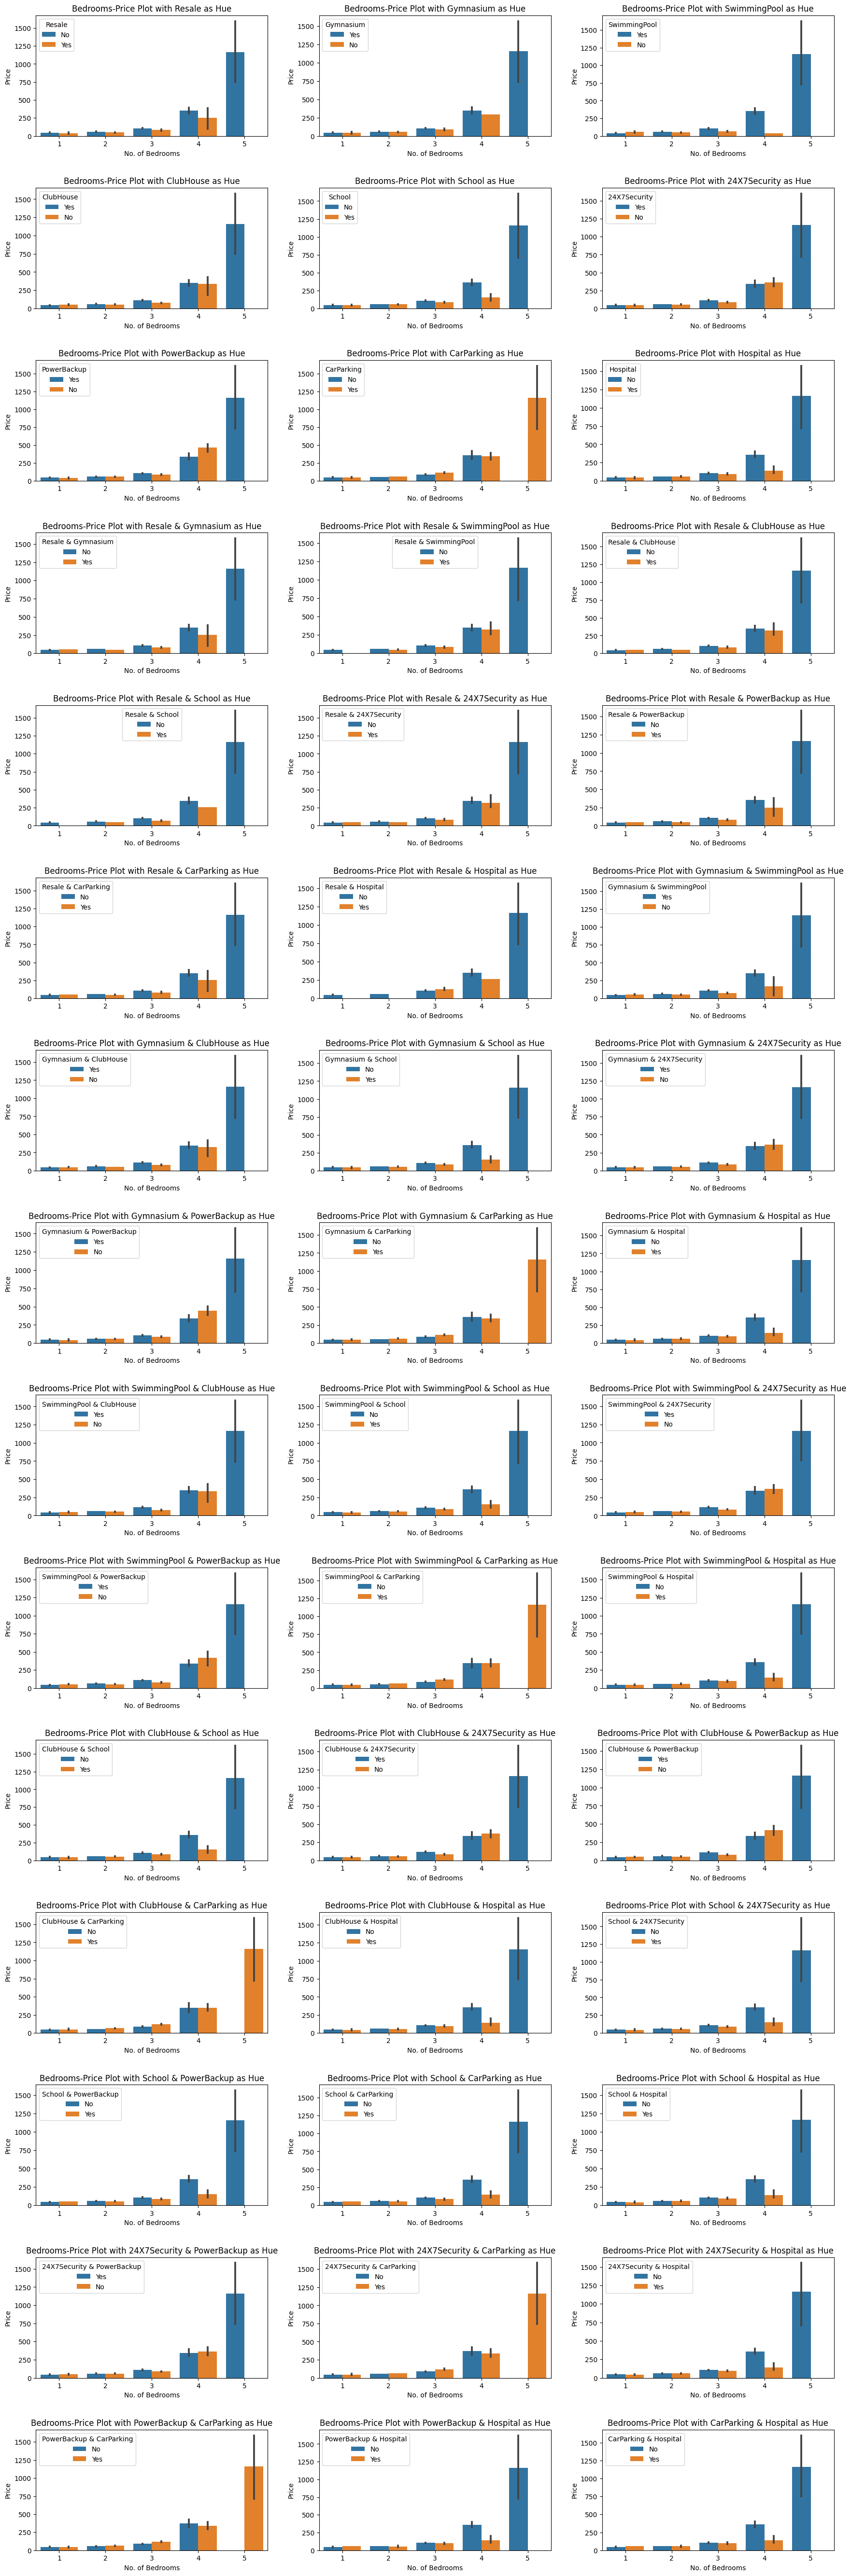

In [414]:
ImpAmenitiesPlot(b_df)

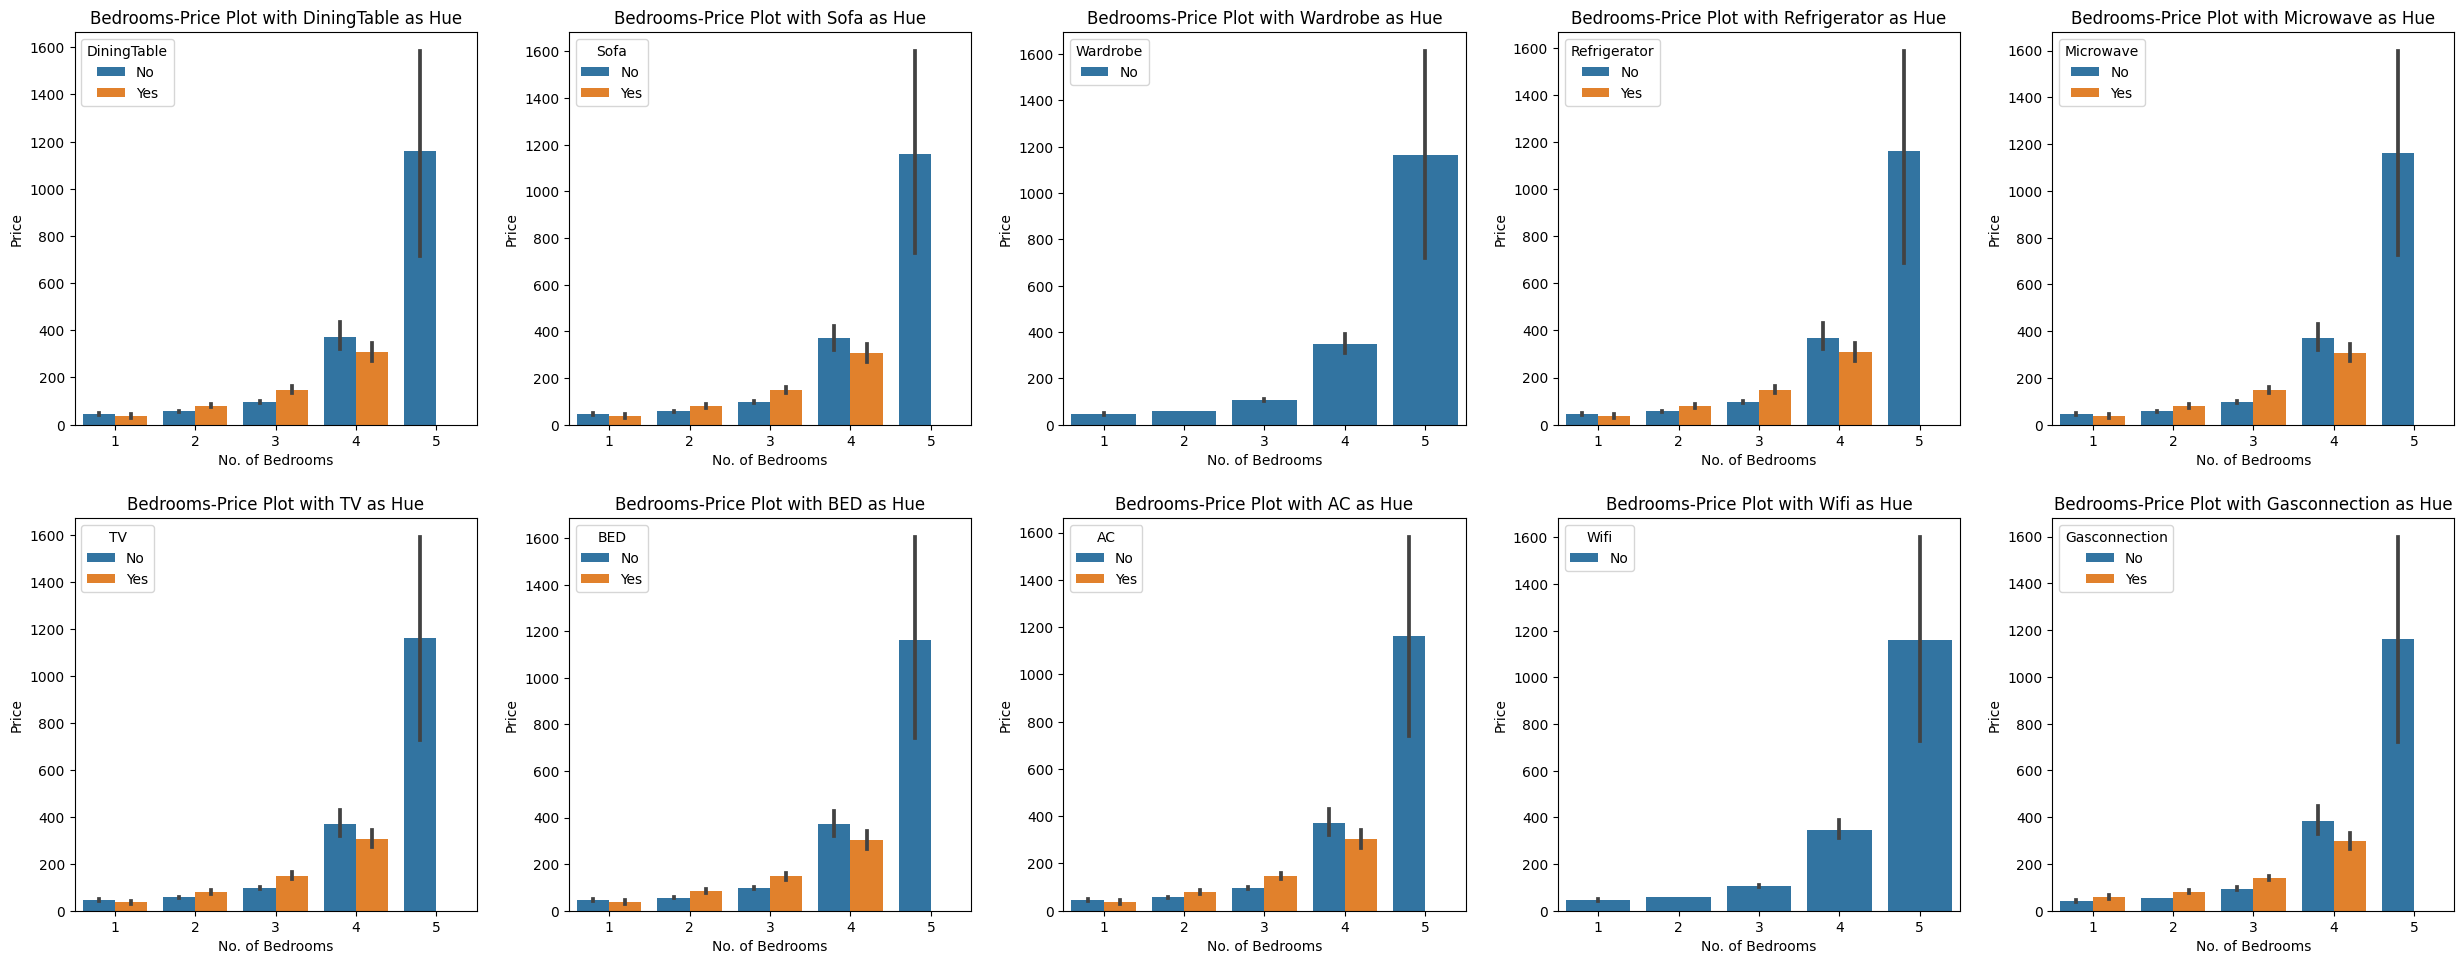

In [415]:
FurnishingPlot(bangalore_df)

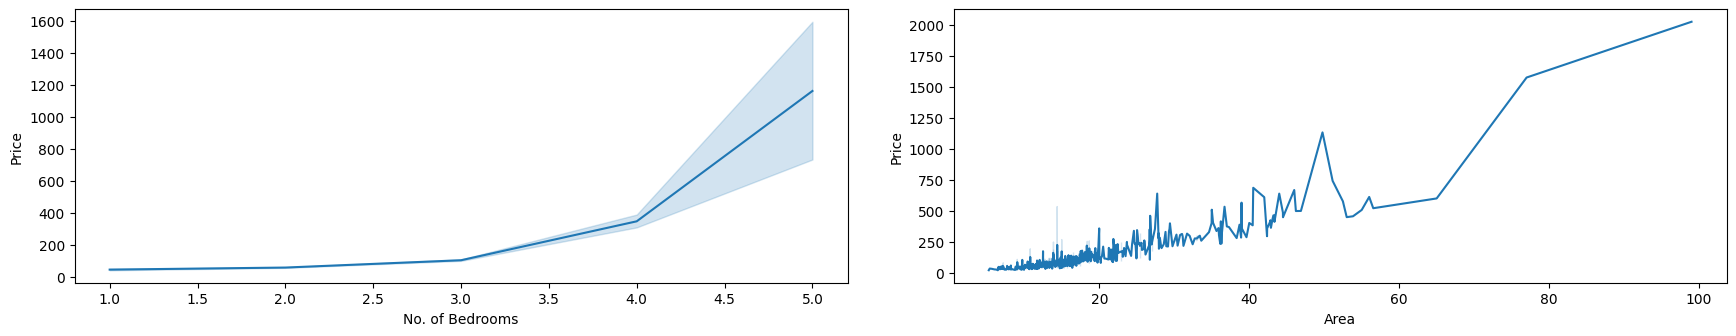

In [416]:
LinePlots(bangalore_df)

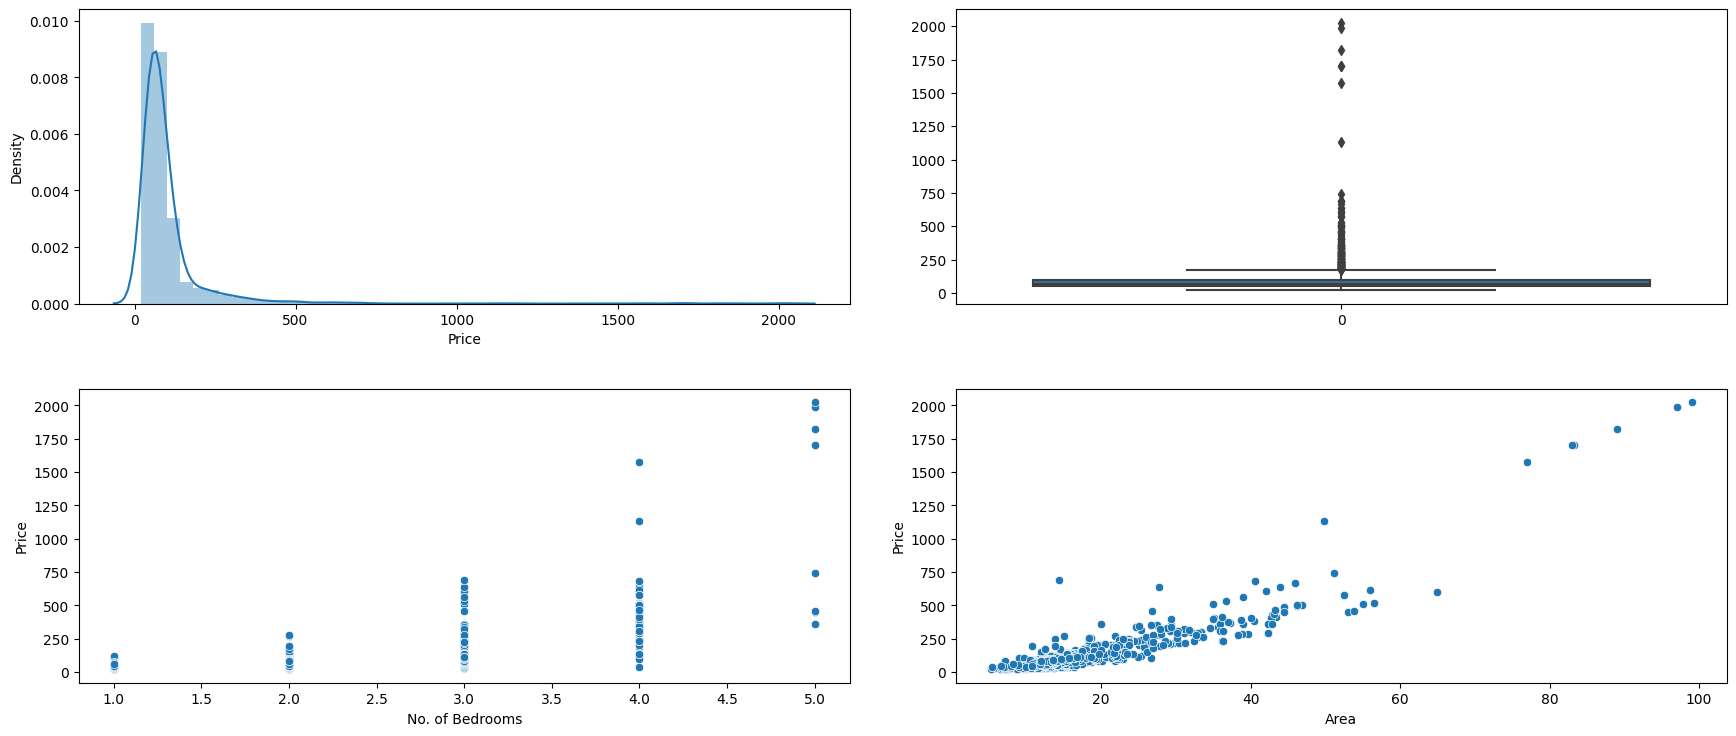

In [417]:
QuadPlot(bangalore_df)

***

### **Delhi**

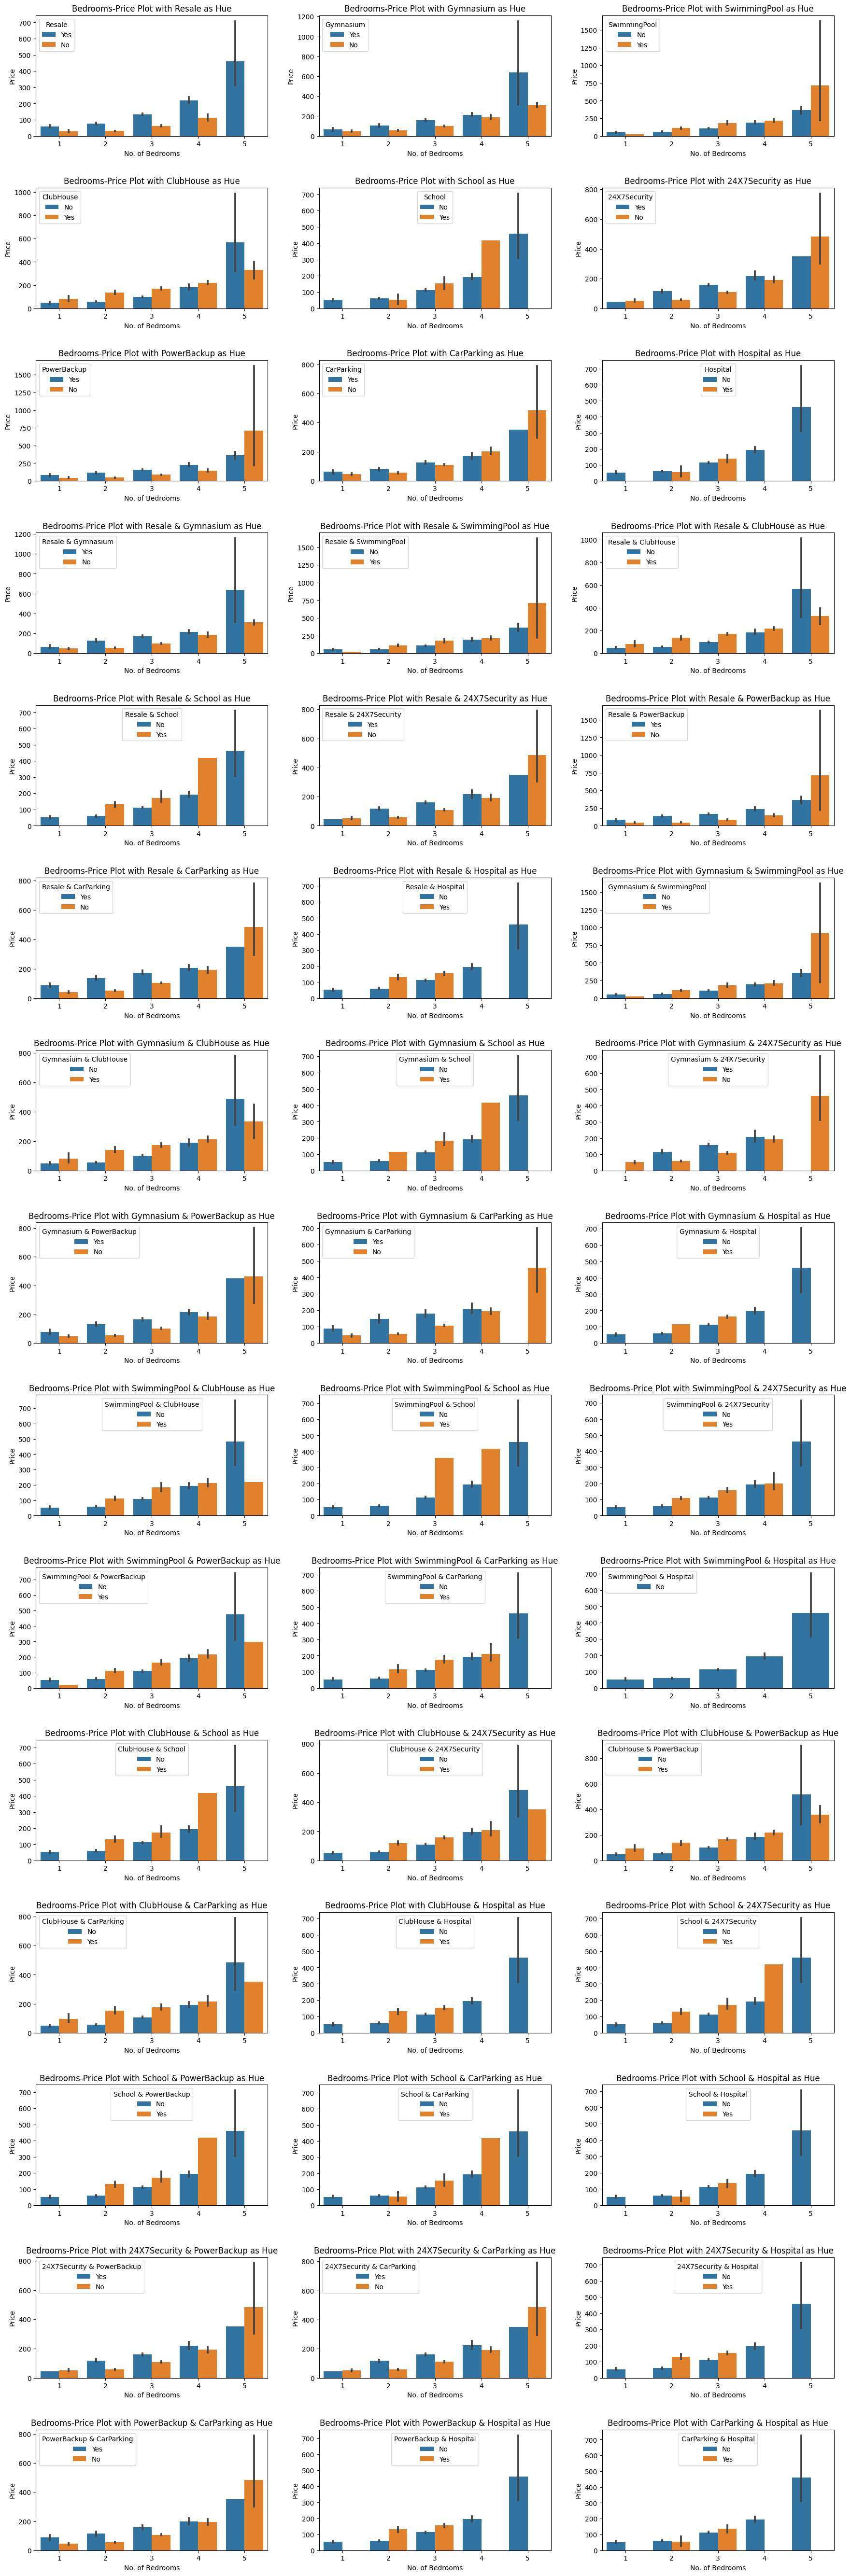

In [418]:
ImpAmenitiesPlot(delhi_df)

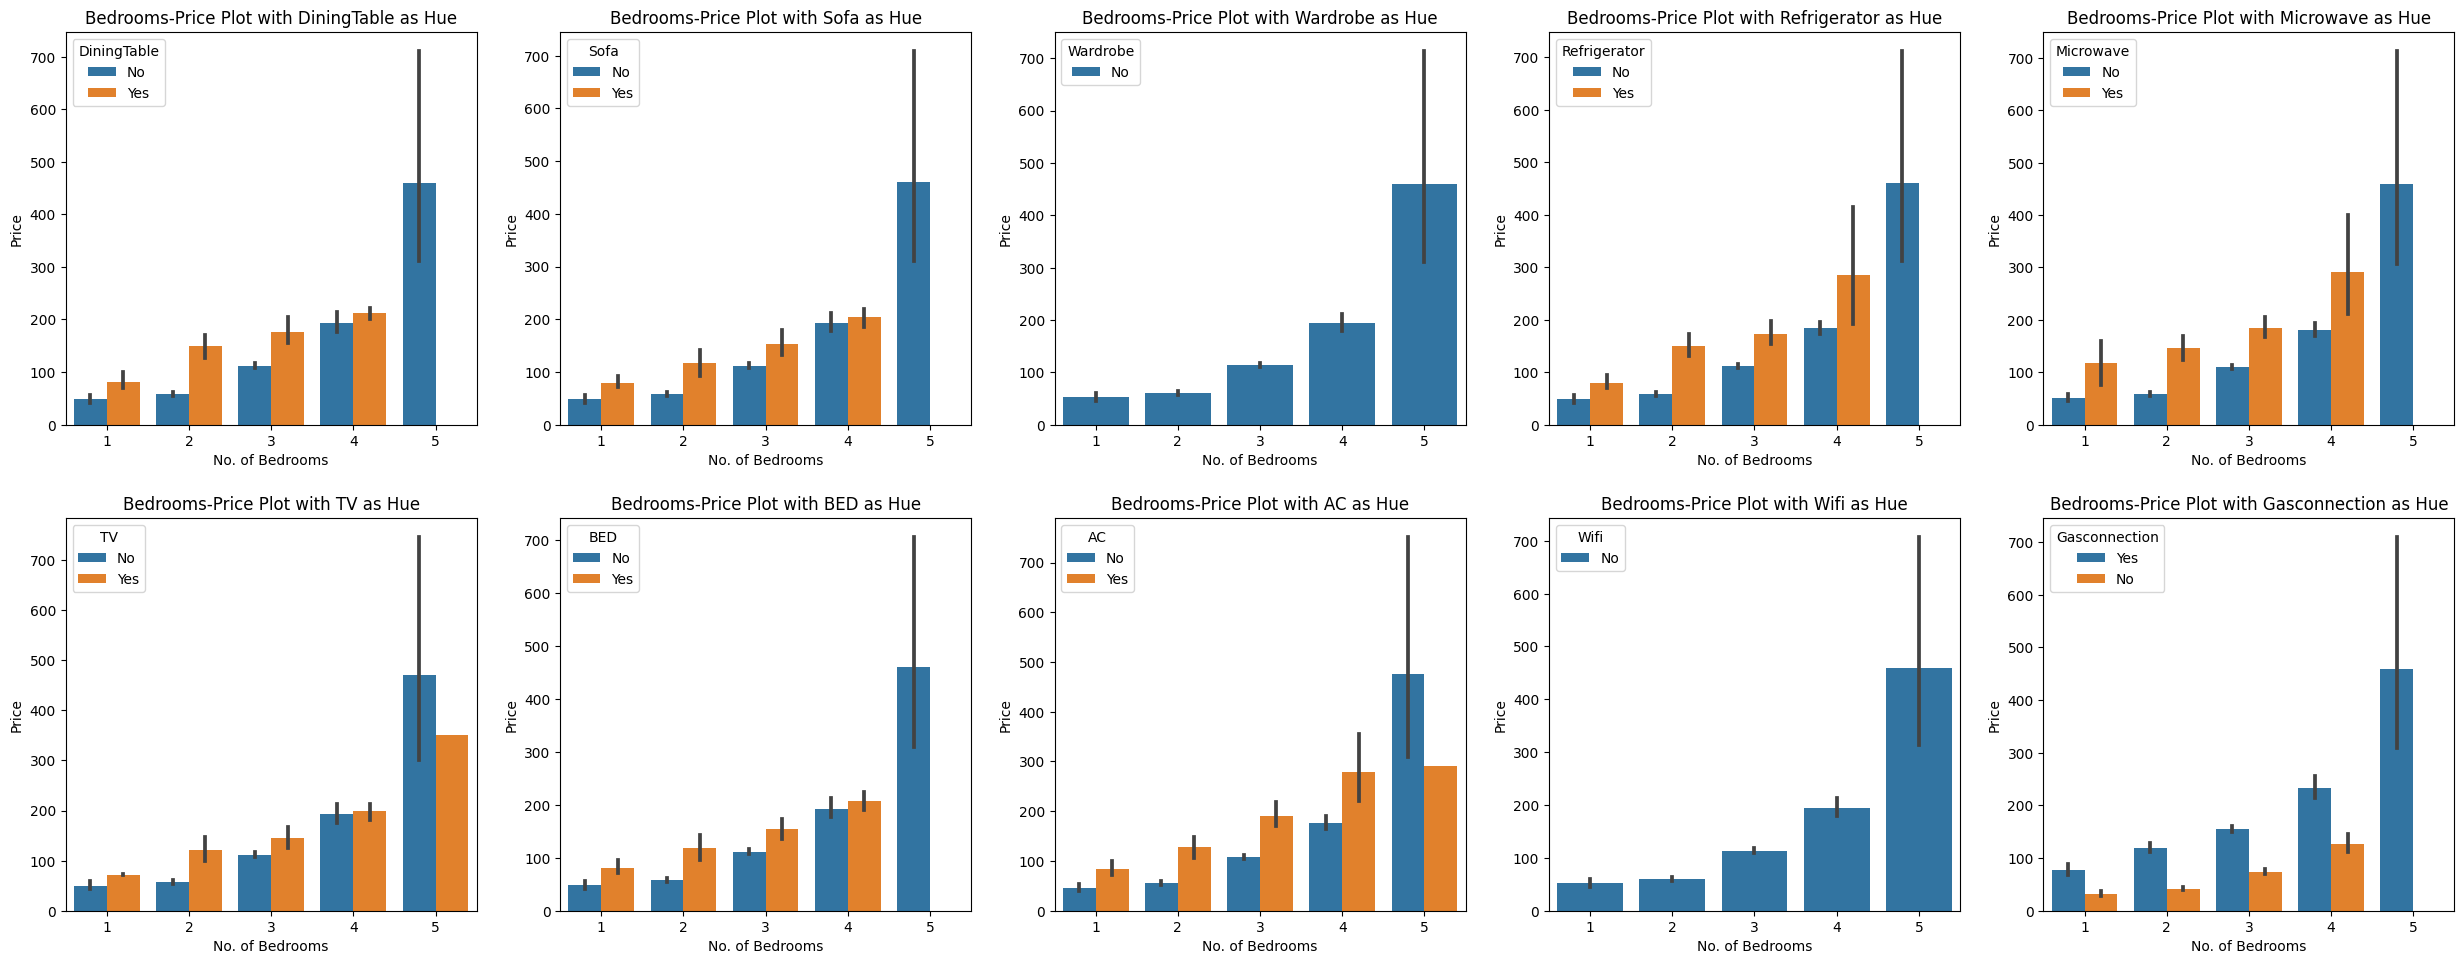

In [419]:
FurnishingPlot(delhi_df)

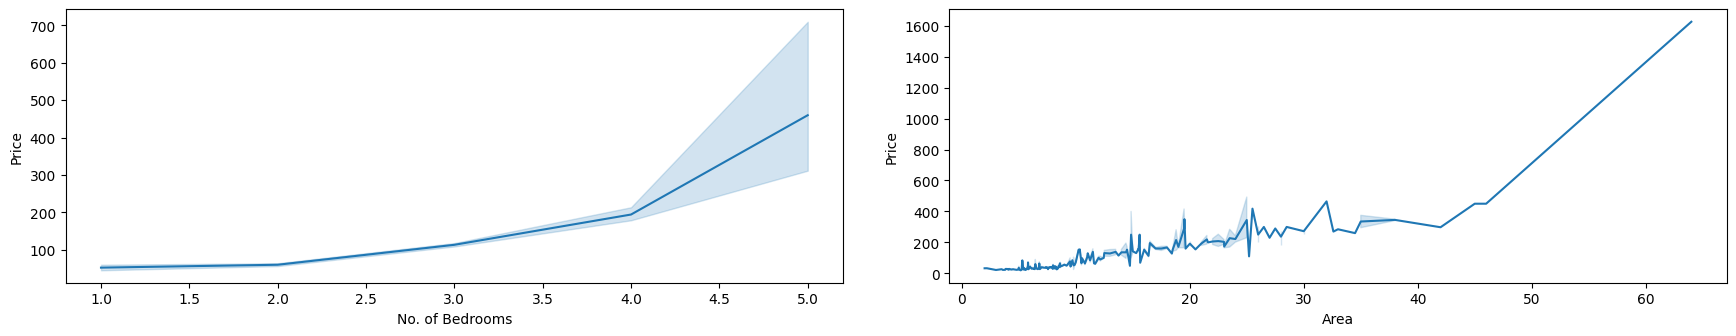

In [420]:
LinePlots(delhi_df)

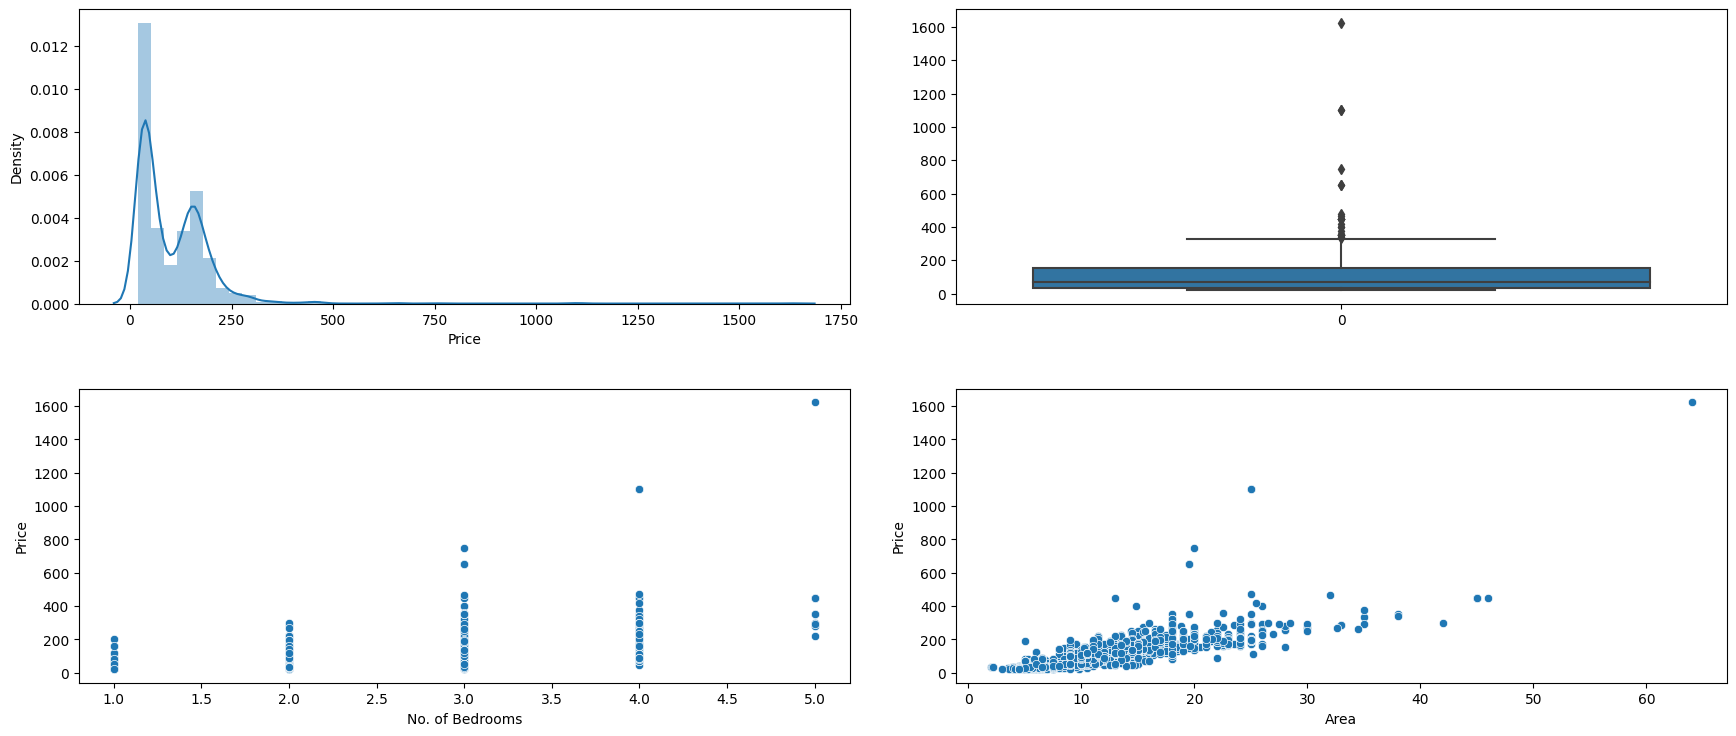

In [421]:
QuadPlot(delhi_df)

***

### **Mumbai**

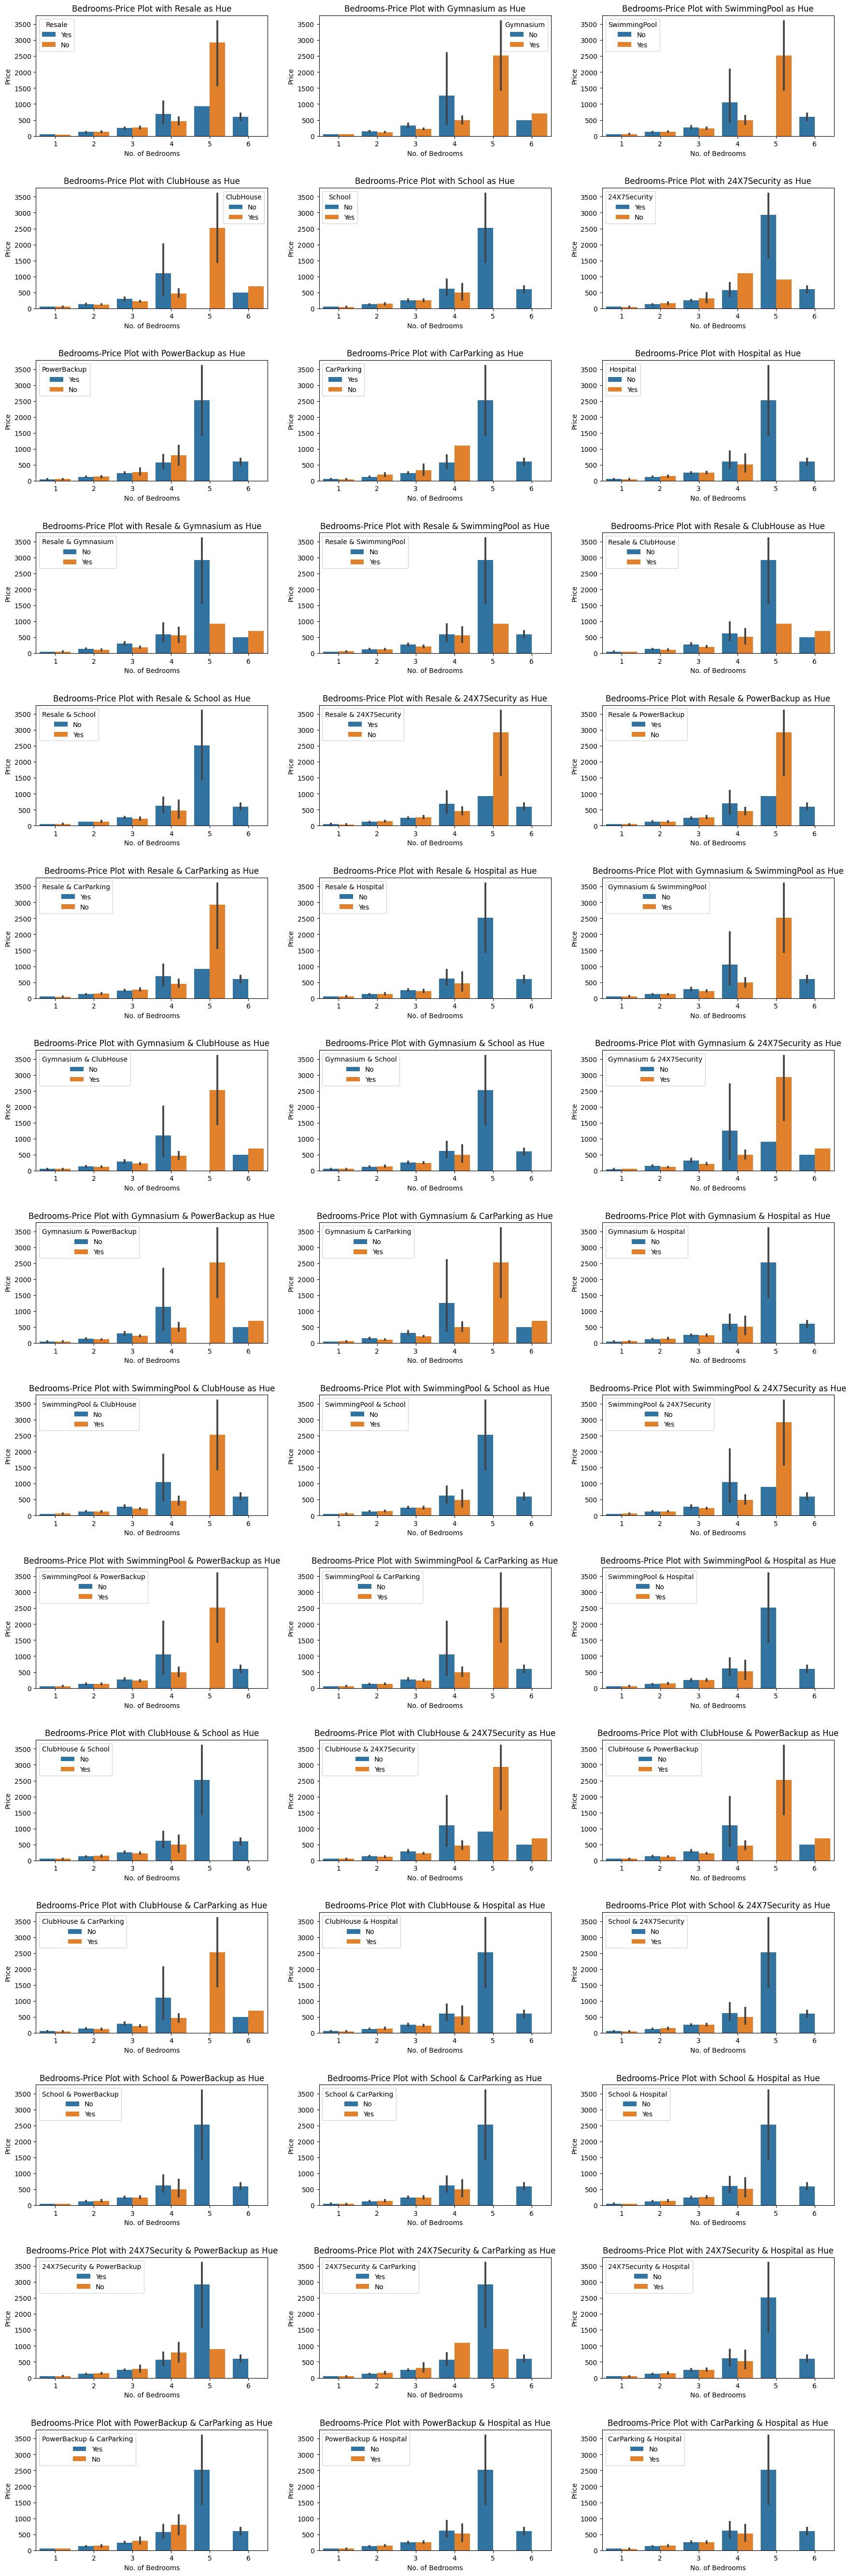

In [422]:
ImpAmenitiesPlot(mumbai_df)

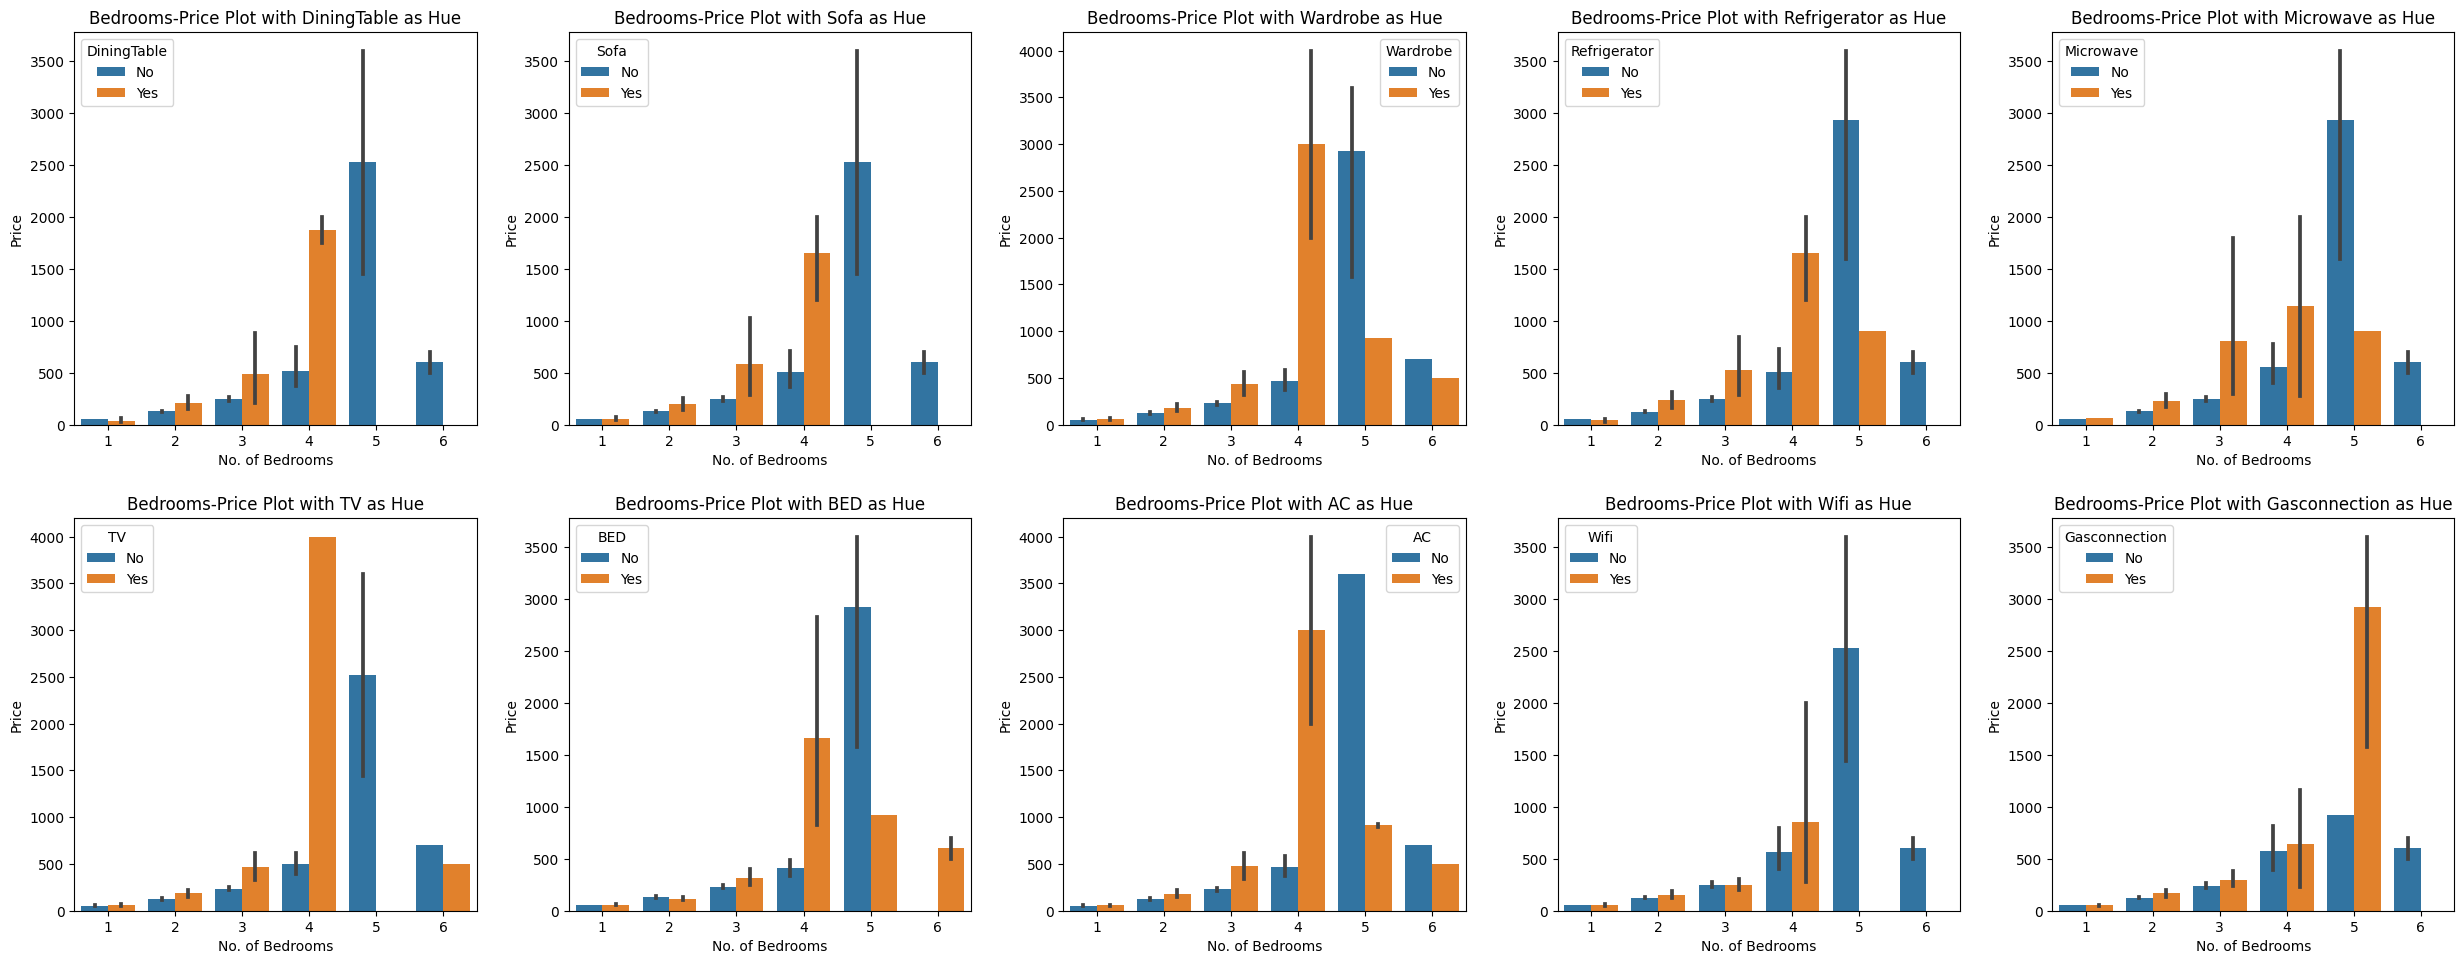

In [423]:
FurnishingPlot(mumbai_df)

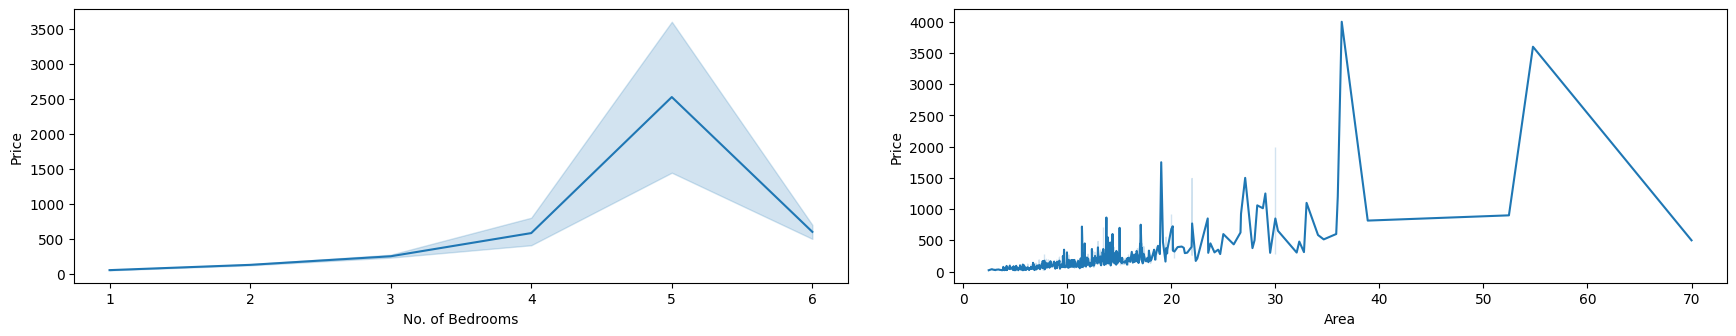

In [424]:
LinePlots(mumbai_df)

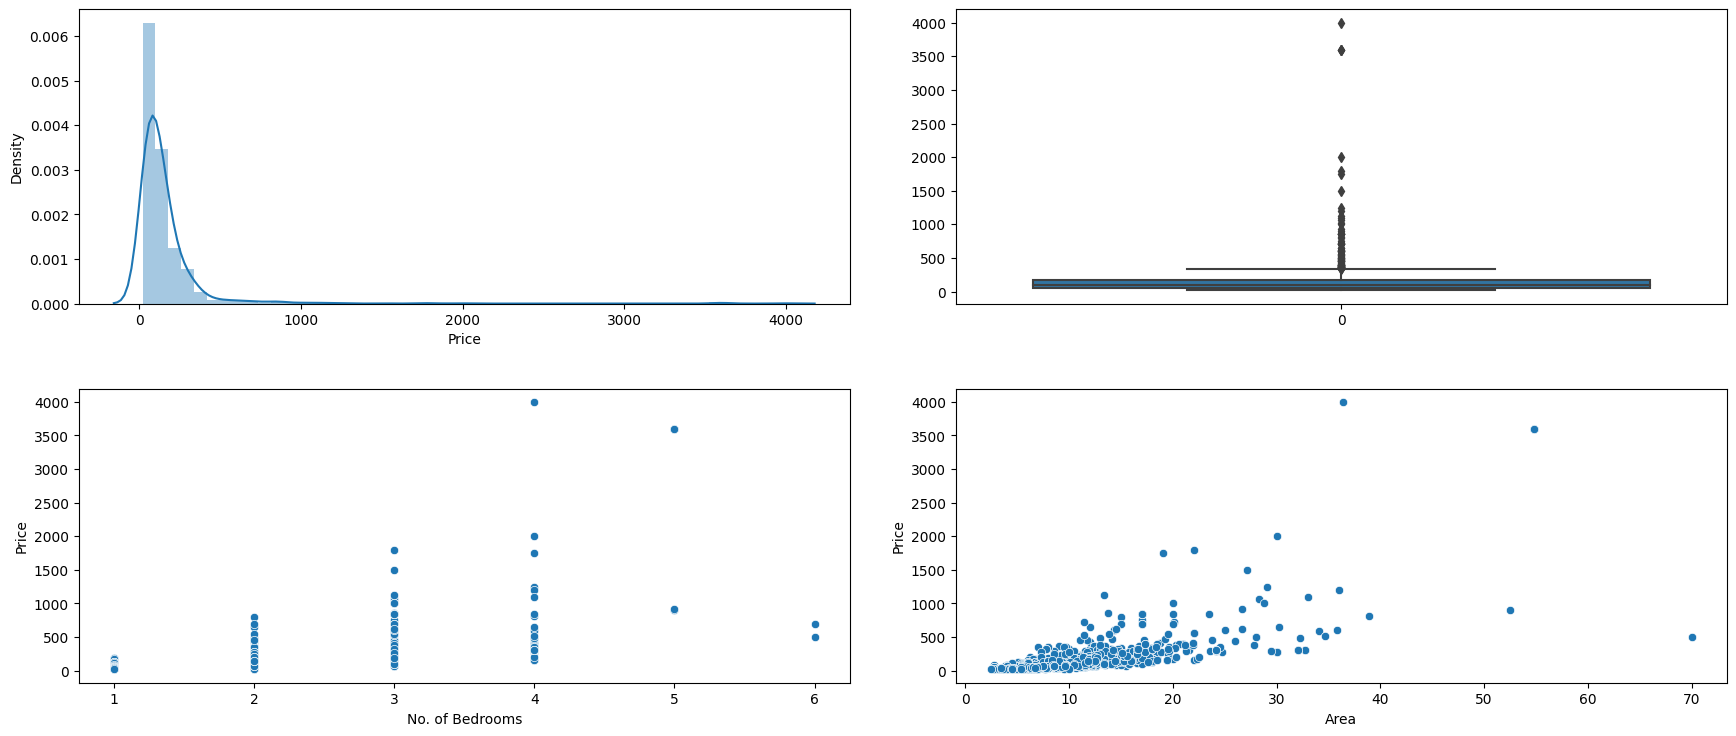

In [425]:
QuadPlot(mumbai_df)

From `BoxPlots` & `ScatterPlots` of all 3 Cities, it is clearly visible that there are some Outliers in `Price`, having very high Prices of some Houses for high values of `Area` and `No. of bedrooms`, so let's look at this point in more detailed way(Statistically).

***

In [426]:
bangalore_df.loc[(bangalore_df['Price']>1000) | (bangalore_df['Area']>60),['Price','Area','No. of Bedrooms']]

Price   Area  No. of Bedrooms
805   1706.0  83.31                5
806   1823.0  89.02                5
808    601.0  65.00                4
817   1986.0  97.00                5
819   2027.0  99.00                5
820   1700.0  83.00                5
821   1577.0  77.00                4
1926  1134.0  49.77                4

In [427]:
delhi_df.loc[(delhi_df['Price']>1000) | (delhi_df['Area']>60),['Price','Area','No. of Bedrooms']]

Price  Area  No. of Bedrooms
15   1100.0  25.0                4
35   1100.0  25.0                4
100  1625.0  64.0                5

In [428]:
mumbai_df.loc[(mumbai_df['Price']>1000) | (mumbai_df['Area']>60),['Price','Area','No. of Bedrooms']]

Price   Area  No. of Bedrooms
299   1060.0  28.26                3
300   1014.0  28.80                3
614   1250.0  29.04                4
879   1800.0  22.00                3
899   3600.0  54.76                5
918   3600.0  54.76                5
930   1750.0  19.03                4
932   1200.0  36.00                4
939   3600.0  54.76                5
970   1500.0  27.10                3
974   4000.0  36.38                4
1084  1125.0  13.40                3
1137  1100.0  33.00                4
1210   500.0  70.00                6
1313  2000.0  30.00                4

According to the data, reasons for Outliers are if Houses having,<br>
- <code>`Area`>6000 sq.ft.</code>
- <code>`No. of Bedrooms`= 4,5,6</code>

##Correlation Graph

***

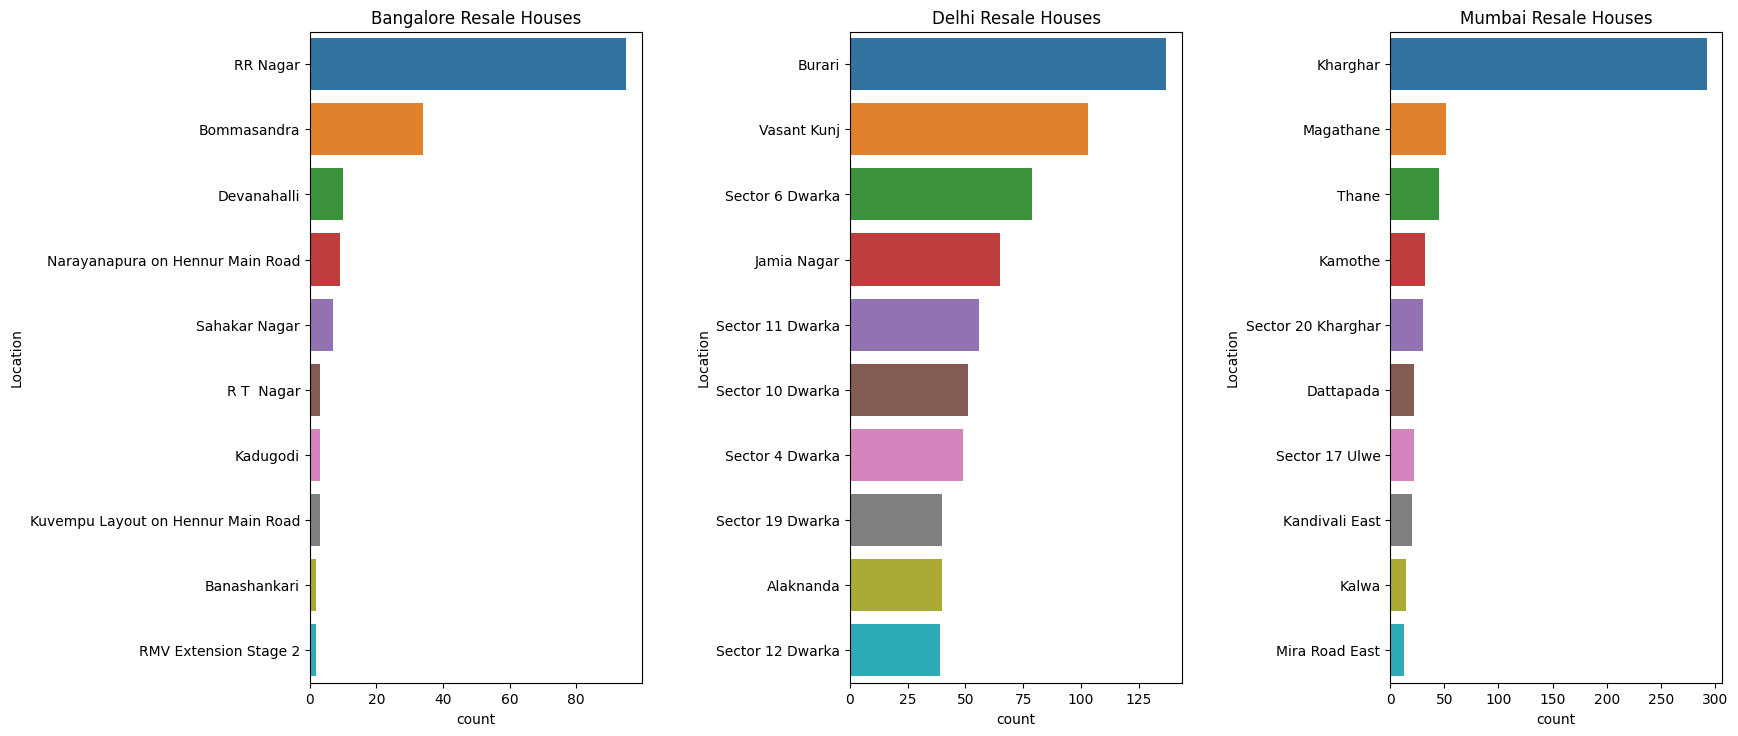

In [429]:
ResaleBLR = bangalore_df[bangalore_df.Resale=='Yes']
ResaleDEL = delhi_df[delhi_df.Resale=='Yes']
ResaleMUM = mumbai_df[mumbai_df.Resale=='Yes']

fig,axes = plt.subplots(1,3,figsize=(18,8))
axes[0].set_title('Bangalore Resale Houses')
sns.countplot(y='Location',data=ResaleBLR,order=ResaleBLR.Location.value_counts().index[:10],ax=axes[0])
axes[1].set_title('Delhi Resale Houses')
sns.countplot(y='Location',data=ResaleDEL,order=ResaleDEL.Location.value_counts().index[:10],ax=axes[1])
axes[2].set_title('Mumbai Resale Houses')
sns.countplot(y='Location',data=ResaleMUM,order=ResaleMUM.Location.value_counts().index[:10],ax=axes[2])
plt.tight_layout(pad=3)
plt.show()

Above are the regions having high number of **Resale** houses

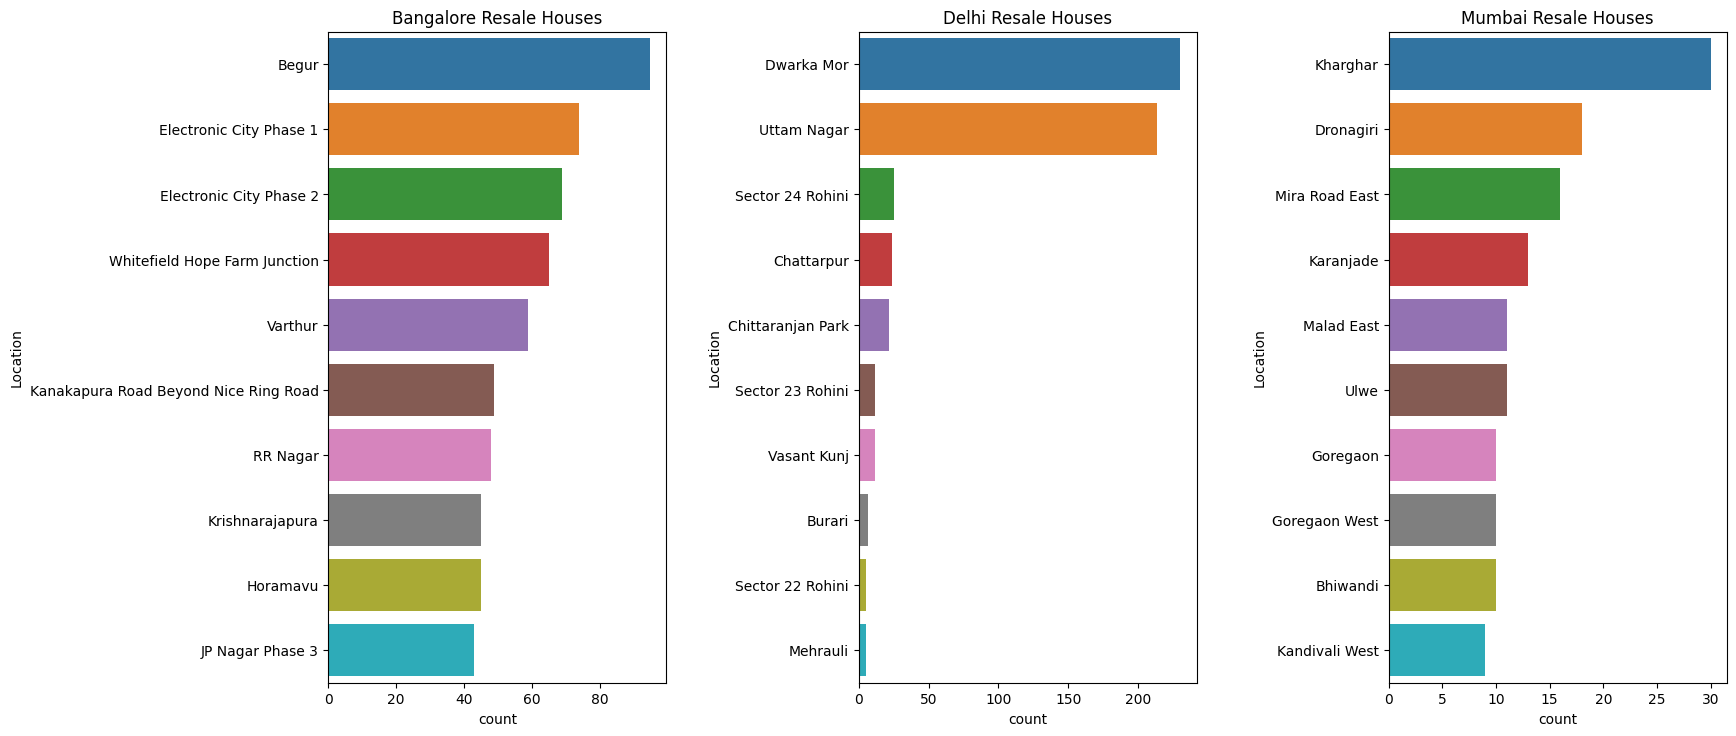

In [430]:
FreshBLR = bangalore_df[bangalore_df.Resale=='No']
FreshDEL = delhi_df[delhi_df.Resale=='No']
FreshMUM = mumbai_df[mumbai_df.Resale=='No']

fig,axes = plt.subplots(1,3,figsize=(18,8))
axes[0].set_title('Bangalore Resale Houses')
sns.countplot(y='Location',data=FreshBLR,order=FreshBLR.Location.value_counts().index[:10],ax=axes[0])
axes[1].set_title('Delhi Resale Houses')
sns.countplot(y='Location',data=FreshDEL,order=FreshDEL.Location.value_counts().index[:10],ax=axes[1])
axes[2].set_title('Mumbai Resale Houses')
sns.countplot(y='Location',data=FreshMUM,order=FreshMUM.Location.value_counts().index[:10],ax=axes[2])
plt.tight_layout(pad=3)
plt.show()

Above are the regions having high number of **Fresh** houses

***

### More Data Visulazation of the given attribute



In [431]:
# Function to Plot Distribution and Variation, to understand the Outliers and Statistical Distribution of Price
def QuadPlot(df):
  fig,axes = plt.subplots(2,2, figsize=(18,8))
  sns.distplot(df['Price'],ax=axes[0,0])
  sns.boxplot(df['Price'],ax=axes[0,1])
  sns.scatterplot(x='No. of Bedrooms', y='Price', data=df, ax=axes[1,0])
  sns.scatterplot(x='Area',y='Price', data=df,ax=axes[1,1])
  plt.tight_layout(pad=3)

### Plotting Houses on Map in each City


In [432]:
def getCoordinates(Location,City):
  loc = Location+", "+City
  print(loc)
  geolocator = Nominatim(user_agent='EkansH',timeout=3)
  geo_loc = geolocator.geocode(loc)

  try:
    coordinates = {'lat':geo_loc.latitude,'lon':geo_loc.longitude}
  except AttributeError:
    coordinates = {'lat':np.nan,'lon':np.nan}

  return coordinates['lat'], coordinates['lon']

In [433]:
bangalore_df['latitude'],bangalore_df['longitude'] = np.vectorize(getCoordinates)(bangalore_df.Location,'Bangalore')
delhi_df['latitude'],delhi_df['longitude'] = np.vectorize(getCoordinates)(delhi_df.Location,'Delhi')
mumbai_df['latitude'],mumbai_df['longitude'] = np.vectorize(getCoordinates)(mumbai_df.Location,'Mumbai')

Streaming output truncated to the last 5000 lines.
Banashankari, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
RR Nagar, Bangalore
Kengeri, Bangalore
Kengeri, Bangalore
Kengeri, Bangalore
Begur, Bangalore
Begur, Bangalore
Begur, Bangalore
Begur, Bangalore
Begur, Bangalore
Begur, Bangalore
Begur, Bangalore
Begur, Bangalore
Ramamurthy Nagar, Bangalore
Ramamurthy Nagar, Bangalore
Ramamurthy Nagar, Bangalore
Ramamurthy Nagar, Bangalore
Ramamurthy Nagar, Bangalore
Attibele, Bangalore
Attibele, Bangalore
Attibele, Bangalore
Attibele, Bangalore
Attibele, Bangalore
Kadugodi, Bangalore
Kadugodi, Bangalore
Kadugodi, Bangalore
Kadugodi, Bangalore
Kadugodi, Ba

In [434]:
bangalore_df.to_csv("/content/gdrive/My Drive/Projects/IndianHousingPrices/Data/bangalore_updated.csv", encoding="utf-8", index=False)
delhi_df.to_csv("/content/gdrive/My Drive/Projects/IndianHousingPrices/Data/delhi_updated.csv", encoding="utf-8", index=False)
mumbai_df.to_csv("/content/gdrive/My Drive/Projects/IndianHousingPrices/mumbai_updated.csv", encoding="utf-8", index=False)

In [435]:
bangalore = pd.read_csv("/content/gdrive/My Drive/Projects/IndianHousingPrices/Data/bangalore_updated.csv")
delhi = delhi_df.copy("/content/gdrive/My Drive/Projects/IndianHousingPrices/Data/delhi_updated.csv")
mumbai = mumbai_df.copy("/content/gdrive/My Drive/Projects/IndianHousingPrices/Data/delhi_updated.csv")

In [436]:
bangalore.head()

Price   Area                         Location  No. of Bedrooms Resale  \
0  300.00  33.40                 JP Nagar Phase 1                4     No   
1   78.88  10.45       Dasarahalli on Tumkur Road                2     No   
2   48.66  11.79  Kannur on Thanisandra Main Road                2     No   
3   83.58  16.75                     Doddanekundi                3     No   
4   68.45  16.70                          Kengeri                3     No   

  MaintenanceStaff Gymnasium SwimmingPool LandscapedGardens JoggingTrack  ...  \
0              Yes       Yes          Yes               Yes          Yes  ...   
1               No       Yes          Yes               Yes          Yes  ...   
2               No       Yes          Yes               Yes          Yes  ...   
3               No        No           No                No           No  ...   
4              Yes       Yes          Yes               Yes          Yes  ...   

  School & CarParking School & Hospital 24X7Security & PowerBackup  \
0                  No                No                        Yes   
1                  No                No                        Yes   
2                  No                No                         No   
3                  No                No                         No   
4                  No                No                        Yes   

  24X7Security & CarParking 24X7Security & Hospital PowerBackup & CarParking  \
0                        No                      No                       No   
1                       Yes                      No                      Yes   
2                        No                      No                       No   
3                        No                      No                       No   
4                       Yes                      No                      Yes   

  PowerBackup & Hospital CarParking & Hospital   latitude  longitude  
0                     No                    No  12.915551  77.577431  
1                     No                    No        NaN        NaN  
2                     No                    No        NaN        NaN  
3                     No                    No  12.971319  77.696477  
4                     No                    No  12.917657  77.483757  

[5 rows x 78 columns]

In [437]:
delhi.head()

Price   Area          Location  No. of Bedrooms Resale MaintenanceStaff  \
0  105.0  12.00  Sector 10 Dwarka                2    Yes               No   
1   60.0  10.00       Uttam Nagar                3     No               No   
2  150.0  13.50      Sarita Vihar                2    Yes               No   
3   25.0   4.35       Uttam Nagar                2     No               No   
4   58.0   9.00        Dwarka Mor                3     No               No   

  Gymnasium SwimmingPool LandscapedGardens JoggingTrack  ...  \
0       Yes           No                No          Yes  ...   
1        No           No                No           No  ...   
2        No           No                No           No  ...   
3        No           No                No           No  ...   
4        No           No                No           No  ...   

  School & CarParking School & Hospital 24X7Security & PowerBackup  \
0                  No                No                        Yes   
1                  No                No                         No   
2                  No                No                         No   
3                  No                No                         No   
4                  No                No                         No   

  24X7Security & CarParking 24X7Security & Hospital PowerBackup & CarParking  \
0                       Yes                      No                      Yes   
1                        No                      No                      Yes   
2                        No                      No                       No   
3                        No                      No                       No   
4                        No                      No                       No   

  PowerBackup & Hospital CarParking & Hospital   latitude  longitude  
0                     No                    No  28.584311  77.057693  
1                     No                    No  28.619074  77.056686  
2                     No                    No  28.528630  77.288359  
3                     No                    No  28.619074  77.056686  
4                     No                    No  28.619310  77.033279  

[5 rows x 78 columns]

In [438]:
mumbai.head()

Price  Area  Location  No. of Bedrooms Resale MaintenanceStaff Gymnasium  \
0   48.5  7.20  Kharghar                1    Yes              Yes        No   
1   45.0  6.00  Kharghar                1    Yes              Yes       Yes   
2   67.0  6.50  Kharghar                1    Yes              Yes       Yes   
3   45.0  6.50  Kharghar                1    Yes              Yes        No   
4   50.0  6.65  Kharghar                1    Yes              Yes        No   

  SwimmingPool LandscapedGardens JoggingTrack  ... School & CarParking  \
0           No                No           No  ...                  No   
1          Yes                No          Yes  ...                  No   
2          Yes                No          Yes  ...                  No   
3           No               Yes           No  ...                  No   
4           No               Yes           No  ...                  No   

  School & Hospital 24X7Security & PowerBackup 24X7Security & CarParking  \
0                No                        Yes                       Yes   
1                No                        Yes                       Yes   
2                No                        Yes                       Yes   
3                No                        Yes                       Yes   
4                No                        Yes                       Yes   

  24X7Security & Hospital PowerBackup & CarParking PowerBackup & Hospital  \
0                      No                      Yes                     No   
1                      No                      Yes                     No   
2                      No                      Yes                     No   
3                      No                      Yes                     No   
4                      No                      Yes                     No   

  CarParking & Hospital   latitude  longitude  
0                    No  19.025773  73.059185  
1                    No  19.025773  73.059185  
2                    No  19.025773  73.059185  
3                    No  19.025773  73.059185  
4                    No  19.025773  73.059185  

[5 rows x 78 columns]

In [439]:
geolocator = Nominatim(user_agent='EkansH',timeout=3)
geo_loc = geolocator.geocode('Bangalore')
blr_coordinates = (geo_loc.latitude,geo_loc.longitude)
print("Bangalore - lat:{},lon:{}".format(geo_loc.latitude,geo_loc.longitude))

Bangalore - lat:12.9767936,lon:77.590082


In [440]:
geolocator = Nominatim(user_agent='EkansH',timeout=3)
geo_loc = geolocator.geocode('Delhi')
del_coordinates = (geo_loc.latitude,geo_loc.longitude)
print("Delhi - lat:{},lon:{}".format(geo_loc.latitude,geo_loc.longitude))

Delhi - lat:28.6517178,lon:77.2219388


In [441]:
geolocator = Nominatim(user_agent='EkansH',timeout=3)
geo_loc = geolocator.geocode('Mumbai')
mum_coordinates = (geo_loc.latitude,geo_loc.longitude)
print("Mumbai - lat:{},lon:{}".format(geo_loc.latitude,geo_loc.longitude))

Mumbai - lat:19.0785451,lon:72.878176


In [442]:
bangalore[bangalore['latitude'].isna()]

Price   Area                          Location  No. of Bedrooms Resale  \
1     78.88  10.45        Dasarahalli on Tumkur Road                2     No   
2     48.66  11.79   Kannur on Thanisandra Main Road                2     No   
8     84.05  14.05     Whitefield Hope Farm Junction                3     No   
14    63.67  14.15     Whitefield Hope Farm Junction                3     No   
19    78.88  10.45        Dasarahalli on Tumkur Road                2     No   
...     ...    ...                               ...              ...    ...   
1871  56.70  12.60  Narayanapura on Hennur Main Road                2     No   
1889  70.00  13.75  Narayanapura on Hennur Main Road                3     No   
1890  70.00  13.75  Narayanapura on Hennur Main Road                3     No   
1917  82.00  12.71   Kannur on Thanisandra Main Road                3     No   
1918  63.00  10.78   Kannur on Thanisandra Main Road                2     No   

     MaintenanceStaff Gymnasium SwimmingPool LandscapedGardens JoggingTrack  \
1                  No       Yes          Yes               Yes          Yes   
2                  No       Yes          Yes               Yes          Yes   
8                  No       Yes          Yes               Yes          Yes   
14                 No       Yes          Yes               Yes          Yes   
19                 No       Yes          Yes               Yes          Yes   
...               ...       ...          ...               ...          ...   
1871               No       Yes          Yes               Yes           No   
1889               No       Yes          Yes               Yes           No   
1890               No       Yes          Yes               Yes           No   
1917               No       Yes          Yes               Yes          Yes   
1918               No       Yes          Yes               Yes          Yes   

      ... School & CarParking School & Hospital 24X7Security & PowerBackup  \
1     ...                  No                No                        Yes   
2     ...                  No                No                         No   
8     ...                  No                No                        Yes   
14    ...                  No                No                         No   
19    ...                  No                No                        Yes   
...   ...                 ...               ...                        ...   
1871  ...                  No                No                        Yes   
1889  ...                  No                No                         No   
1890  ...                  No                No                         No   
1917  ...                  No                No                        Yes   
1918  ...                  No                No                        Yes   

     24X7Security & CarParking 24X7Security & Hospital  \
1                          Yes                      No   
2                           No                      No   
8                           No                      No   
14                          No                      No   
19                         Yes                      No   
...                        ...                     ...   
1871                        No                      No   
1889                        No                      No   
1890                        No                      No   
1917                       Yes                      No   
1918                       Yes                      No   

     PowerBackup & CarParking PowerBackup & Hospital CarParking & Hospital  \
1                         Yes                     No                    No   
2                          No                     No                    No   
8                          No                     No                    No   
14                         No                     No                    No   
19                        Yes                     No                    

In [443]:
delhi[delhi['latitude'].isna()]

Price   Area            Location  No. of Bedrooms Resale  \
66    128.00  18.43  Shanti Park Dwarka                3     No   
86     45.00   8.10      Mansa Ram Park                3    Yes   
218   145.00  19.00    Pochanpur Colony                3    Yes   
220   145.00  19.00    Pochanpur Colony                3    Yes   
344    65.00   7.00            Saidabad                2    Yes   
643   174.00  18.00    Pochanpur Colony                3    Yes   
724    24.51   5.50      Mansa Ram Park                2     No   
782   115.00  13.75    Rohini Extension                3    Yes   
893   107.00  16.38  Shanti Park Dwarka                3     No   
911    32.00   6.16      Mansa Ram Park                2    Yes   
912    32.00   6.16      Mansa Ram Park                2    Yes   
913    28.00   5.05      Mansa Ram Park                2    Yes   
914    28.00   5.05      Mansa Ram Park                2    Yes   
915    27.00   5.05      Mansa Ram Park                2    Yes   
918    34.00   6.75      Mansa Ram Park                2    Yes   
950    27.00   5.05      Mansa Ram Park                2    Yes   
952    48.00   8.10      Mansa Ram Park                3    Yes   
953    32.00   6.16      Mansa Ram Park                2    Yes   
954    31.00   6.16      Mansa Ram Park                2    Yes   
955    27.00   5.05      Mansa Ram Park                2    Yes   
956    52.00   8.55      Mansa Ram Park                3    Yes   
957    33.00   6.16      Mansa Ram Park                2    Yes   
988    34.00   6.75      Mansa Ram Park                2    Yes   
991    62.00   9.00      Mansa Ram Park                3    Yes   
993    48.00   9.00      Mansa Ram Park                3    Yes   
995    38.00   6.75      Mansa Ram Park                3    Yes   
996    35.00   6.30      Mansa Ram Park                3    Yes   
1027   32.00   6.16      Mansa Ram Park                2    Yes   
1092   23.00   5.00      Mansa Ram Park                2    Yes   
1097   35.00   7.20      Mansa Ram Park                3    Yes   
1168  165.00  23.02  Shanti Park Dwarka                3    Yes   
1169  120.00  16.38  Shanti Park Dwarka                2    Yes   
1170  100.00  12.45  Shanti Park Dwarka                2     No   
1171  100.00  12.45  Shanti Park Dwarka                2    Yes   
1172  175.00  23.02  Shanti Park Dwarka                4    Yes   
1173  180.00  23.02  Shanti Park Dwarka                4    Yes   
1199   95.00  11.00     Sidhartha Nagar                2    Yes   
1253  155.00  18.00        Sainik Farms                4    Yes   
1264   52.00  10.00      Mansa Ram Park                3    Yes   
1274   53.00  10.00      Mansa Ram Park                3    Yes   
1278   53.00  10.00      Mansa Ram Park                3    Yes   
1413   47.00   8.10      Mansa Ram Park                3    Yes   
1414   47.00   8.55      Mansa Ram Park                3    Yes   
1423   23.50   5.40      Mansa Ram Park                2     No   
1434   35.00   6.75      Mansa Ram Park                3    Yes   
1621   23.00   4.50      Mansa Ram Park                2    Yes   
1818   25.00   4.10    Khirki Extension                1    Yes   
1967   34.00   6.75      Mansa Ram Park                3    Yes   

     MaintenanceStaff Gymnasium SwimmingPool LandscapedGardens JoggingTrack  \
66                 No       Yes          Yes               Yes          Yes   
86                 No        No           No                No           No   
218                No       Yes           No                No           No   
220                No       Yes           No                No           No   
344                No        No           No                No           No   
643                No        No           No                No           No   
724                No       Yes           No                No           No   
782                No        No           No                No           No   
893         

In [444]:
mumbai[mumbai['latitude'].isna()]

Price   Area                  Location  No. of Bedrooms Resale  \
7     105.00000  13.70        Sector-13 Kharghar                3    Yes   
16     80.00000  12.50        Sector 18 Kharghar                2    Yes   
109    50.00000   6.00        Sector 20 Kharghar                1    Yes   
193   130.00000  14.55        Sector 18 Kharghar                3    Yes   
206    75.00000  10.22        Sector 18 Kharghar                2    Yes   
...         ...    ...                       ...              ...    ...   
1259  113.99999   4.48              Akurli Nagar                1    Yes   
1260   73.00000  11.49            Kasar vadavali                3    Yes   
1276   45.00000   4.57  Mumbai Nashik Expressway                1    Yes   
1280   45.00000   4.57  Mumbai Nashik Expressway                1    Yes   
1287   23.00000   6.90            Ambernath East                1    Yes   

     MaintenanceStaff Gymnasium SwimmingPool LandscapedGardens JoggingTrack  \
7                 Yes        No           No                No           No   
16                Yes       Yes           No               Yes           No   
109               Yes        No           No               Yes           No   
193               Yes        No           No                No           No   
206               Yes        No           No                No           No   
...               ...       ...          ...               ...          ...   
1259              Yes        No           No                No           No   
1260               No       Yes          Yes               Yes           No   
1276              Yes        No           No               Yes           No   
1280              Yes        No           No               Yes           No   
1287              Yes       Yes          Yes               Yes          Yes   

      ... School & CarParking School & Hospital 24X7Security & PowerBackup  \
7     ...                  No                No                        Yes   
16    ...                  No                No                        Yes   
109   ...                  No                No                        Yes   
193   ...                  No                No                        Yes   
206   ...                  No                No                        Yes   
...   ...                 ...               ...                        ...   
1259  ...                  No                No                        Yes   
1260  ...                  No                No                         No   
1276  ...                  No                No                         No   
1280  ...                  No                No                         No   
1287  ...                  No                No                        Yes   

     24X7Security & CarParking 24X7Security & Hospital  \
7                          Yes                      No   
16                         Yes                      No   
109                        Yes                      No   
193                        Yes                      No   
206                        Yes                      No   
...                        ...                     ...   
1259                       Yes                      No   
1260                        No                      No   
1276                        No                      No   
1280                        No                      No   
1287                       Yes                      No   

     PowerBackup & CarParking PowerBackup & Hospital CarParking & Hospital  \
7                         Yes                     No                    No   
16                        Yes                     No                    No   
109                       Yes                     No                    No   
193                       Yes                     No                    No   
206                       Yes                     No                    No   
...                       ...                 

In [445]:
bangalore.dropna(axis=0, inplace=True)
delhi.dropna(axis=0, inplace=True)
mumbai.dropna(axis=0, inplace=True)

In [446]:
# Function to generate Map of each City to identify the regions where Houses are present
def GenerateMap(df,coordinates):
  map = folium.Map(location=coordinates, zoom_start=10)
  HouseCluster = folium.plugins.MarkerCluster().add_to(map)
  for idx,row in df.iterrows():
    folium.Marker([row.latitude,row.longitude],popup=str(row['Price'])+' Lacs').add_to(HouseCluster)
  return map

In [447]:
GenerateMap(bangalore,blr_coordinates)

In [448]:
GenerateMap(delhi,del_coordinates)

In [449]:
GenerateMap(mumbai,mum_coordinates)

***

## Final Conclusion of the Analysis

As per the Data provided, we categorized variables in 2 different Categories,
- `Import Amenities`, like Hospitals, Gym, Swimming Pool, etc. which tells that whether Houses have these amenities nearby.
- `Furnishing`, like Wardrobe, AC, TV, etc. which tells that whether the House is provided by these Furnishings, whether the House is Fully furnished or Non Furnished.



**Important Amenities:-**
- Resale variable has some serious impact over Price, if House is on Resale then the Price will be low as compared to Fresh House.
- Similarly, Gym, ClubHouse, 24X7Security, PowerBackup, CarParking, also positively impact the Price.
- Unlikely, Swimming Pool, School, Hospital impacting the Price in a Negative manner, which means that if these Amenities are not situated nearby to the Property, then its price will be Higher comparatively, which means that Houses are in Outskirts of the City, as far distant from Hospitals, Schools.

**Furnishing:-**
- In Furnishing Category, there is a strange trend that 1,2 or 3 Bedrooms Houses have Higher Prices which are Furnished in a way, like AC, TV, Wardrobe, etc. are provided. But as you go towards 4 or 5 Bedroom House, their Prices are higher if these Furnitures are not provided.

- As the No. of Bedrooms and Area of House, their Prices goes on increasing.

According to BoxPlot & ScatterPlot, there are Outliers in the Prices for 4 or 5 Bedrooms and House Area more then 6000sq.ft.

**Conclusion Statement:** <br>
*Fresh Houses in Outskirts of the City, having Important Amenities like, Gym, Clubhouse, 24X7Security, PowerBackup, CarParking and not having Nearby Hospitals & Schools are more expensive.*
*Also if a Family is planning to Purchase a 4 or 5 Bedroom House, then they might have their own furnitures, due to which they want Houses Non-Furnished, and Unfurnished Houses are expensive.*
*Alternatively, if a small family or bachelors are planning to purchase a House then they require Furnished Houses.*
*Anyone who is eligible to spend more money to purchase a house, they will get more number of bedrooms and more area, and vice-versa.*